DATA ANALYSIS
--






🔍 Disease Prediction Data Analyzer

📋 Comprehensive data report:
🔄 Loading data...
✅ Loaded 4920 disease cases

🏥 Disease analysis:
📊 Number of different diseases: 41
📈 Disease distribution:
   - Minimum frequency: 120
   - Maximum frequency: 120
   - Mean frequency: 120.0
   - Standard deviation: 0.0
   - Is the data balanced: Yes ✅

🔝 Top 10 most common diseases:
    1. Fungal infection                120 cases
    2. Allergy                         120 cases
    3. GERD                            120 cases
    4. Chronic cholestasis             120 cases
    5. Drug Reaction                   120 cases
    6. Peptic ulcer diseae             120 cases
    7. AIDS                            120 cases
    8. Diabetes                        120 cases
    9. Gastroenteritis                 120 cases
   10. Bronchial Asthma                120 cases

🔍 Symptom analysis:
📊 Number of different symptoms: 131
📈 Symptom statistics:
   - Most frequent symptom:  fatigue (1932 times)
   - Least fr

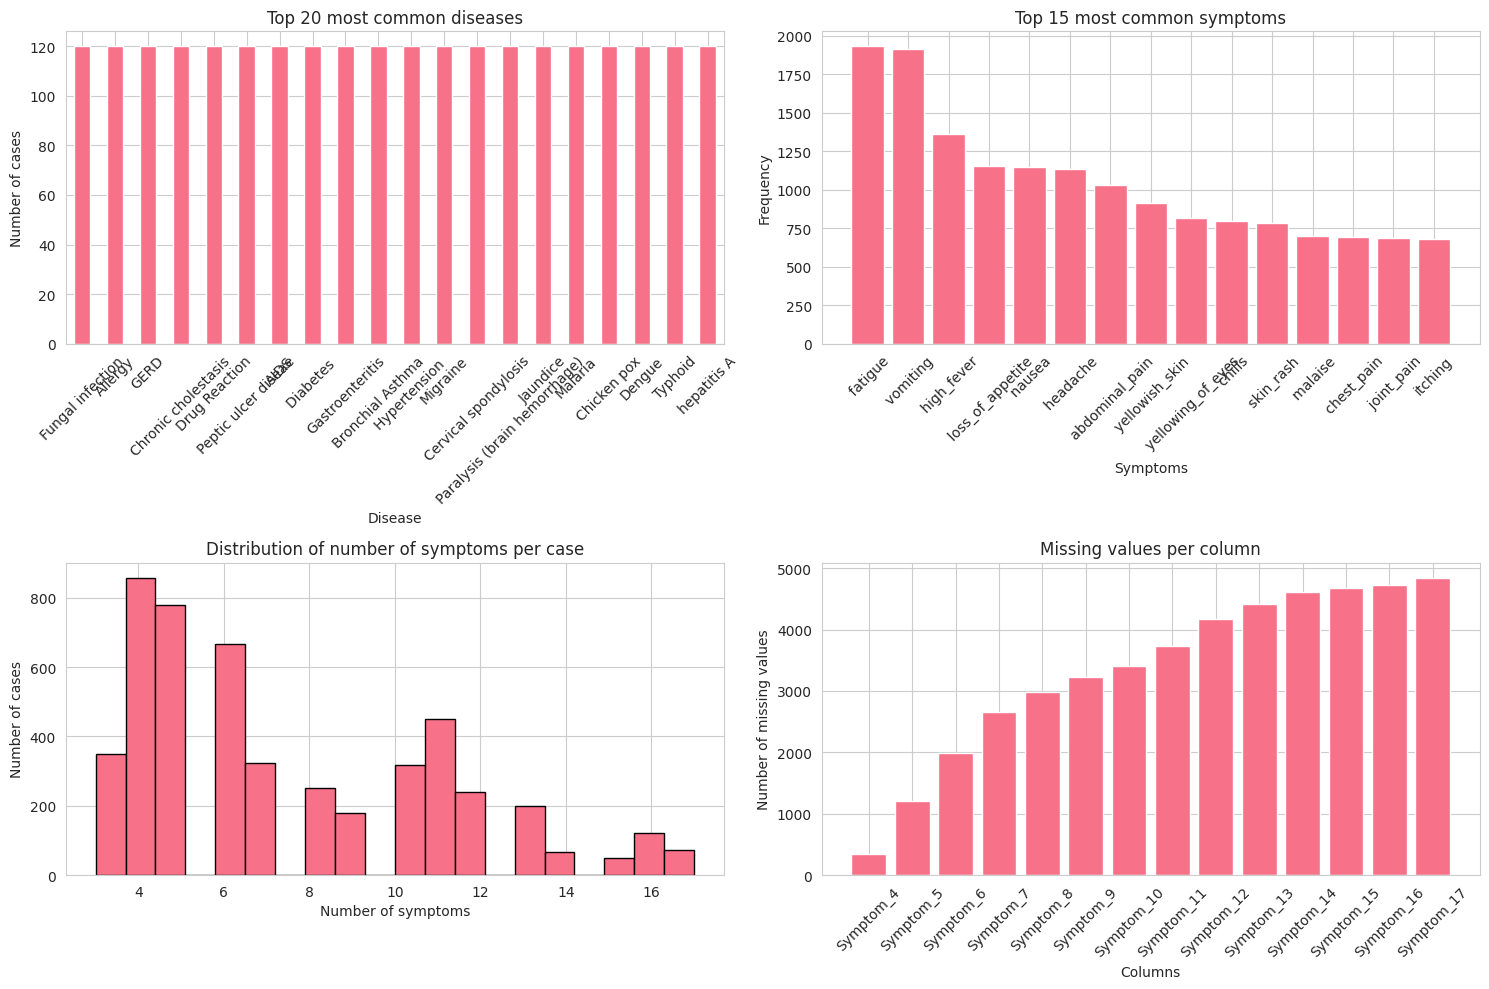

✅ Visualizations saved in file disease_analysis.png

✅ Analysis completed!


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set Arabic font
plt.rcParams['font.family'] = 'DejaVu Sans'

class DiseaseDataAnalyzer:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = None

    def load_data(self):
        """Load data"""
        print("🔄 Loading data...")
        self.df = pd.read_csv(self.file_path)
        print(f"✅ Loaded {len(self.df)} disease cases")
        return self.df

    def basic_info(self):
        """Basic information about the data"""
        print("\n📊 Basic information:")
        print("=" * 50)
        print(f"📈 Number of rows: {self.df.shape[0]:,}")
        print(f"📊 Number of columns: {self.df.shape[1]}")
        print(f"💾 Data size: {self.df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

        # Column info
        print(f"\n📋 Column names:")
        for i, col in enumerate(self.df.columns, 1):
            print(f"   {i:2d}. {col}")

    def analyze_diseases(self):
        """Analyze diseases"""
        print("\n🏥 Disease analysis:")
        print("=" * 50)

        disease_counts = self.df['Disease'].value_counts()

        print(f"📊 Number of different diseases: {len(disease_counts)}")
        print(f"📈 Disease distribution:")
        print(f"   - Minimum frequency: {disease_counts.min()}")
        print(f"   - Maximum frequency: {disease_counts.max()}")
        print(f"   - Mean frequency: {disease_counts.mean():.1f}")
        print(f"   - Standard deviation: {disease_counts.std():.1f}")

        # Is the data balanced?
        is_balanced = disease_counts.min() == disease_counts.max()
        print(f"   - Is the data balanced: {'Yes ✅' if is_balanced else 'No ❌'}")

        if not is_balanced:
            imbalance_ratio = disease_counts.max() / disease_counts.min()
            print(f"   - Imbalance ratio: {imbalance_ratio:.1f}:1")

        print(f"\n🔝 Top 10 most common diseases:")
        for i, (disease, count) in enumerate(disease_counts.head(10).items(), 1):
            print(f"   {i:2d}. {disease:30s} {count:4d} cases")

        return disease_counts

    def analyze_symptoms(self):
        """Analyze symptoms"""
        print("\n🔍 Symptom analysis:")
        print("=" * 50)

        # Collect all symptoms
        all_symptoms = []
        for col in self.df.columns[1:]:  # all columns except Disease
            symptoms = self.df[col].dropna().tolist()
            all_symptoms.extend(symptoms)

        symptom_counts = Counter(all_symptoms)

        print(f"📊 Number of different symptoms: {len(symptom_counts)}")
        print(f"📈 Symptom statistics:")
        print(f"   - Most frequent symptom: {symptom_counts.most_common(1)[0][0]} ({symptom_counts.most_common(1)[0][1]} times)")
        print(f"   - Least frequent symptom: {symptom_counts.most_common()[-1][0]} ({symptom_counts.most_common()[-1][1]} times)")
        print(f"   - Mean frequency: {np.mean(list(symptom_counts.values())):.1f}")

        print(f"\n🔝 Top 15 most common symptoms:")
        for i, (symptom, count) in enumerate(symptom_counts.most_common(15), 1):
            percentage = (count / len(all_symptoms)) * 100
            print(f"   {i:2d}. {symptom:30s} {count:4d} ({percentage:5.1f}%)")

        return symptom_counts

    def analyze_missing_data(self):
        """Analyze missing values"""
        print("\n❓ Missing values analysis:")
        print("=" * 50)

        missing_data = self.df.isnull().sum()
        total_missing = missing_data.sum()

        print(f"📊 Total missing values: {total_missing:,}")
        print(f"📈 Percentage of missing values: {(total_missing / (self.df.shape[0] * self.df.shape[1])) * 100:.2f}%")

        if total_missing > 0:
            print(f"\n📋 Missing values per column:")
            for col, missing in missing_data.items():
                if missing > 0:
                    percentage = (missing / len(self.df)) * 100
                    print(f"   - {col:20s}: {missing:4d} ({percentage:5.1f}%)")
        else:
            print("✅ No missing values!")

        return missing_data

    def analyze_symptom_patterns(self):
        """Analyze symptom patterns"""
        print("\n🔬 Symptom patterns analysis:")
        print("=" * 50)

        # Number of symptoms per case
        symptom_counts_per_case = self.df.iloc[:, 1:].notna().sum(axis=1)

        print(f"📊 Statistics of number of symptoms per case:")
        print(f"   - Minimum symptoms: {symptom_counts_per_case.min()}")
        print(f"   - Maximum symptoms: {symptom_counts_per_case.max()}")
        print(f"   - Mean symptoms: {symptom_counts_per_case.mean():.2f}")
        print(f"   - Median: {symptom_counts_per_case.median():.1f}")

        # Distribution of number of symptoms
        print(f"\n📈 Distribution of number of symptoms:")
        distribution = symptom_counts_per_case.value_counts().sort_index()
        for count, freq in distribution.items():
            percentage = (freq / len(symptom_counts_per_case)) * 100
            print(f"   {count:2d} symptoms: {freq:4d} cases ({percentage:5.1f}%)")

        return symptom_counts_per_case

    def create_visualizations(self):
        """Create visualizations"""
        print("\n📊 Creating visualizations...")

        # 1. Disease distribution
        plt.figure(figsize=(15, 10))

        # Plot disease distribution
        plt.subplot(2, 2, 1)
        disease_counts = self.df['Disease'].value_counts()
        disease_counts.head(20).plot(kind='bar')
        plt.title('Top 20 most common diseases')
        plt.xlabel('Disease')
        plt.ylabel('Number of cases')
        plt.xticks(rotation=45)

        # Plot symptom distribution
        plt.subplot(2, 2, 2)
        all_symptoms = []
        for col in self.df.columns[1:]:
            symptoms = self.df[col].dropna().tolist()
            all_symptoms.extend(symptoms)

        symptom_counts = Counter(all_symptoms)
        top_symptoms = dict(symptom_counts.most_common(15))
        plt.bar(range(len(top_symptoms)), list(top_symptoms.values()))
        plt.title('Top 15 most common symptoms')
        plt.xlabel('Symptoms')
        plt.ylabel('Frequency')
        plt.xticks(range(len(top_symptoms)), list(top_symptoms.keys()), rotation=45)

        # Plot distribution of number of symptoms
        plt.subplot(2, 2, 3)
        symptom_counts_per_case = self.df.iloc[:, 1:].notna().sum(axis=1)
        plt.hist(symptom_counts_per_case, bins=20, edgecolor='black')
        plt.title('Distribution of number of symptoms per case')
        plt.xlabel('Number of symptoms')
        plt.ylabel('Number of cases')

        # Plot missing values
        plt.subplot(2, 2, 4)
        missing_data = self.df.isnull().sum()
        missing_data = missing_data[missing_data > 0]
        if len(missing_data) > 0:
            plt.bar(range(len(missing_data)), missing_data.values)
            plt.title('Missing values per column')
            plt.xlabel('Columns')
            plt.ylabel('Number of missing values')
            plt.xticks(range(len(missing_data)), missing_data.index, rotation=45)
        else:
            plt.text(0.5, 0.5, 'No missing values', ha='center', va='center', transform=plt.gca().transAxes)
            plt.title('Missing values')

        plt.tight_layout()
        plt.savefig('disease_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

        print("✅ Visualizations saved in file disease_analysis.png")

    def generate_report(self):
        """Generate a comprehensive report"""
        print("\n📋 Comprehensive data report:")
        print("=" * 60)

        # Load data
        self.load_data()

        # Analyses
        disease_counts = self.analyze_diseases()
        symptom_counts = self.analyze_symptoms()
        missing_data = self.analyze_missing_data()
        symptom_patterns = self.analyze_symptom_patterns()

        # Summary
        print(f"\n📊 Data summary:")
        print("=" * 50)
        print(f"✅ Total cases: {len(self.df):,}")
        print(f"✅ Number of diseases: {len(disease_counts)}")
        print(f"✅ Number of symptoms: {len(symptom_counts)}")
        print(f"✅ Data balanced: {'Yes' if disease_counts.min() == disease_counts.max() else 'No'}")
        print(f"✅ Average symptoms/case: {symptom_patterns.mean():.1f}")

        return {
            'disease_counts': disease_counts,
            'symptom_counts': symptom_counts,
            'missing_data': missing_data,
            'symptom_patterns': symptom_patterns
        }

def main():
    """Main function"""
    print("🔍 Disease Prediction Data Analyzer")
    print("=" * 50)

    # Create analyzer
    analyzer = DiseaseDataAnalyzer('/content/DiseaseAndSymptoms.csv')

    # Run analysis
    results = analyzer.generate_report()

    # Create visualizations
    analyzer.create_visualizations()

    print("\n✅ Analysis completed!")

if __name__ == "__main__":
    main()


ML MODELS AND TEST
--

ML MODELS AND TEST
--

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

class DiseaseMLModel:
    def __init__(self):
        self.model = None
        self.label_encoder = LabelEncoder()
        self.symptom_columns = []
        self.disease_names = []
        self.X = None
        self.y = None

    def load_data(self, file_path):
        """Load data from CSV file"""
        print("🔄 Loading data...")
        self.df = pd.read_csv(file_path)
        print(f"✅ Loaded {len(self.df)} disease cases")
        print(f"📊 Number of columns: {self.df.shape[1]}")
        return self.df

    def analyze_data(self):
        """Comprehensive data analysis"""
        print("\n📈 Data Analysis:")
        print("=" * 50)

        # Disease analysis
        disease_counts = self.df['Disease'].value_counts()
        print(f"🏥 Number of different diseases: {len(disease_counts)}")
        print(f"📊 Disease distribution:")
        print(f"   - Minimum frequency: {disease_counts.min()}")
        print(f"   - Maximum frequency: {disease_counts.max()}")
        print(f"   - Balanced: {'Yes' if disease_counts.min() == disease_counts.max() else 'No'}")

        # Symptom analysis
        all_symptoms = []
        for col in self.df.columns[1:]:
            symptoms = self.df[col].dropna().tolist()
            all_symptoms.extend(symptoms)

        from collections import Counter
        symptom_counts = Counter(all_symptoms)
        print(f"\n🔍 Symptom Analysis:")
        print(f"   - Number of different symptoms: {len(symptom_counts)}")
        print(f"   - Top 5 common symptoms:")
        for symptom, count in symptom_counts.most_common(5):
            print(f"     • {symptom}: {count} times")

        # Missing values analysis
        print(f"\n❓ Missing values analysis:")
        missing_data = self.df.isnull().sum()
        for col, missing in missing_data.items():
            if missing > 0:
                print(f"   - {col}: {missing} ({missing/len(self.df)*100:.1f}%)")

        return disease_counts, symptom_counts

    def preprocess_data(self):
        """Clean and preprocess data"""
        print("\n🔧 Data preprocessing:")
        print("=" * 50)

        # Collect all symptoms in one list
        all_symptoms = set()
        for col in self.df.columns[1:]:
            symptoms = self.df[col].dropna().unique()
            all_symptoms.update(symptoms)

        self.symptom_columns = sorted(list(all_symptoms))
        print(f"✅ Found {len(self.symptom_columns)} different symptoms")

        # Create binary matrix for symptoms
        symptom_matrix = np.zeros((len(self.df), len(self.symptom_columns)))

        for idx, row in self.df.iterrows():
            for col in self.df.columns[1:]:
                symptom = row[col]
                if pd.notna(symptom) and symptom in self.symptom_columns:
                    symptom_idx = self.symptom_columns.index(symptom)
                    symptom_matrix[idx, symptom_idx] = 1

        # Create DataFrame for symptoms
        self.X = pd.DataFrame(symptom_matrix, columns=self.symptom_columns)

        # Encode diseases
        self.y = self.label_encoder.fit_transform(self.df['Disease'])
        self.disease_names = self.label_encoder.classes_

        print(f"✅ Prepared {self.X.shape[1]} features and {len(self.disease_names)} diseases")
        print(f"📊 Data shape: {self.X.shape}")

        return self.X, self.y

    def train_multiple_models(self):
        """Train multiple models and compare them"""
        print("\n🤖 Training models:")
        print("=" * 50)

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42, stratify=self.y
        )

        # Define models
        models = {
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
            'Gradient Boosting': GradientBoostingClassifier(random_state=42),
            'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
            'SVM': SVC(random_state=42, probability=True)
        }

        results = {}

        for name, model in models.items():
            print(f"\n🔄 Training {name}...")

            # Train model
            model.fit(X_train, y_train)

            # Prediction
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            # Cross-validation
            cv_scores = cross_val_score(model, self.X, self.y, cv=5)

            results[name] = {
                'model': model,
                'accuracy': accuracy,
                'cv_mean': cv_scores.mean(),
                'cv_std': cv_scores.std()
            }

            print(f"   ✅ Model accuracy: {accuracy:.3f}")
            print(f"   ✅ CV mean: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

        # Select best model
        best_model_name = max(results.keys(), key=lambda x: results[x]['accuracy'])
        self.model = results[best_model_name]['model']

        print(f"\n🏆 Best model: {best_model_name}")
        print(f"   Accuracy: {results[best_model_name]['accuracy']:.3f}")

        return results, X_test, y_test

    def evaluate_model(self, X_test, y_test):
        """Comprehensive model evaluation"""
        print("\n📊 Model evaluation:")
        print("=" * 50)

        # Prediction
        y_pred = self.model.predict(X_test)

        # Model accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"🎯 Model accuracy: {accuracy:.3f}")

        # Detailed report
        print(f"\n📋 Classification Report:")
        report = classification_report(y_test, y_pred, target_names=self.disease_names)
        print(report)

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        print(f"\n🔢 Confusion Matrix (First 10x10):")
        print(cm[:10, :10])

        return accuracy, y_pred

    def predict_disease(self, symptoms):
        """Predict disease based on symptoms"""
        if self.model is None:
            raise ValueError("Model is not trained yet!")

        # Convert symptoms to binary vector
        symptom_vector = np.zeros(len(self.symptom_columns))
        for symptom in symptoms:
            if symptom in self.symptom_columns:
                idx = self.symptom_columns.index(symptom)
                symptom_vector[idx] = 1

        # Prediction
        prediction = self.model.predict([symptom_vector])[0]
        probability = self.model.predict_proba([symptom_vector])[0]

        disease_name = self.disease_names[prediction]
        confidence = probability[prediction]

        # Get top 5 predictions
        top_5_indices = np.argsort(probability)[-5:][::-1]
        top_5_diseases = [(self.disease_names[idx], probability[idx]) for idx in top_5_indices]

        return {
            'predicted_disease': disease_name,
            'confidence': confidence,
            'top_5_predictions': top_5_diseases
        }

    def get_feature_importance(self, top_n=20):
        """Get most important features"""
        if hasattr(self.model, 'feature_importances_'):
            importances = self.model.feature_importances_
            indices = np.argsort(importances)[::-1][:top_n]

            print(f"\n🔍 Top {top_n} symptoms:")
            print("=" * 50)
            for i, idx in enumerate(indices, 1):
                print(f"{i:2d}. {self.symptom_columns[idx]:25s} {importances[idx]:.4f}")

            return indices, importances
        else:
            print("❌ This model does not support feature importance")
            return None, None

    def save_model(self, filepath='disease_model.pkl'):
        """Save model"""
        model_data = {
            'model': self.model,
            'label_encoder': self.label_encoder,
            'symptom_columns': self.symptom_columns,
            'disease_names': self.disease_names
        }
        with open(filepath, 'wb') as f:
            pickle.dump(model_data, f)
        print(f"✅ Model saved to {filepath}")

    def load_model(self, filepath='disease_model.pkl'):
        """Load model"""
        with open(filepath, 'rb') as f:
            model_data = pickle.load(f)

        self.model = model_data['model']
        self.label_encoder = model_data['label_encoder']
        self.symptom_columns = model_data['symptom_columns']
        self.disease_names = model_data['disease_names']
        print(f"✅ Model loaded from {filepath}")

def main():
    """Main function to run the project"""
    print("🏥 Disease Prediction Project - Machine Learning")
    print("=" * 60)

    # Create model object
    ml_model = DiseaseMLModel()

    # Load data
    df = ml_model.load_data('/content/DiseaseAndSymptoms.csv')

    # Analyze data
    disease_counts, symptom_counts = ml_model.analyze_data()

    # Preprocess data
    X, y = ml_model.preprocess_data()

    # Train models
    results, X_test, y_test = ml_model.train_multiple_models()

    # Evaluate model
    accuracy, y_pred = ml_model.evaluate_model(X_test, y_test)

    # Feature importance
    ml_model.get_feature_importance()

    # Save model
    ml_model.save_model()

    # Test prediction
    print("\n🧪 Prediction test:")
    print("=" * 50)

    test_cases = [
        ['fatigue', 'vomiting', 'high_fever', 'headache'],
        ['itching', 'skin_rash', 'nodal_skin_eruptions'],
        ['cough', 'chest_pain', 'shortness_of_breath'],
        ['abdominal_pain', 'nausea', 'loss_of_appetite']
    ]

    for i, symptoms in enumerate(test_cases, 1):
        print(f"\n{i}. Test symptoms: {symptoms}")
        result = ml_model.predict_disease(symptoms)
        print(f"   🎯 Prediction: {result['predicted_disease']}")
        print(f"   📈 Confidence: {result['confidence']:.3f}")
        print(f"   🏆 Top 3 predictions:")
        for j, (disease, conf) in enumerate(result['top_5_predictions'][:3], 1):
            print(f"      {j}. {disease}: {conf:.3f}")

if __name__ == "__main__":
    main()


🏥 Disease Prediction Project - Machine Learning
🔄 Loading data...
✅ Loaded 4920 disease cases
📊 Number of columns: 18

📈 Data Analysis:
🏥 Number of different diseases: 41
📊 Disease distribution:
   - Minimum frequency: 120
   - Maximum frequency: 120
   - Balanced: Yes

🔍 Symptom Analysis:
   - Number of different symptoms: 131
   - Top 5 common symptoms:
     •  fatigue: 1932 times
     •  vomiting: 1914 times
     •  high_fever: 1362 times
     •  loss_of_appetite: 1152 times
     •  nausea: 1146 times

❓ Missing values analysis:
   - Symptom_4: 348 (7.1%)
   - Symptom_5: 1206 (24.5%)
   - Symptom_6: 1986 (40.4%)
   - Symptom_7: 2652 (53.9%)
   - Symptom_8: 2976 (60.5%)
   - Symptom_9: 3228 (65.6%)
   - Symptom_10: 3408 (69.3%)
   - Symptom_11: 3726 (75.7%)
   - Symptom_12: 4176 (84.9%)
   - Symptom_13: 4416 (89.8%)
   - Symptom_14: 4614 (93.8%)
   - Symptom_15: 4680 (95.1%)
   - Symptom_16: 4728 (96.1%)
   - Symptom_17: 4848 (98.5%)

🔧 Data preprocessing:
✅ Found 131 different sympt

Disease_ml_modelS
--

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pickle
import numpy as np

def test_disease_prediction():
    """Test the disease prediction system"""

    print("🧪 Testing the disease prediction system")
    print("=" * 50)

    try:
        # Load the model
        with open('disease_model.pkl', 'rb') as f:
            model_data = pickle.load(f)

        model = model_data['model']
        label_encoder = model_data['label_encoder']
        symptom_columns = model_data['symptom_columns']
        disease_names = model_data['disease_names']

        print("✅ Model loaded successfully")
        print(f"📊 Number of symptoms: {len(symptom_columns)}")
        print(f"🏥 Number of diseases: {len(disease_names)}")

        # Different test cases
        test_cases = [
            {
                'name': 'Case of fever and headache',
                'symptoms': ['high_fever', 'headache', 'fatigue']
            },
            {
                'name': 'Digestive system problems',
                'symptoms': ['vomiting', 'nausea', 'abdominal_pain', 'loss_of_appetite']
            },
            {
                'name': 'Skin problems',
                'symptoms': ['itching', 'skin_rash', 'nodal_skin_eruptions']
            },
            {
                'name': 'Respiratory problems',
                'symptoms': ['cough', 'chest_pain', 'shortness_of_breath']
            },
            {
                'name': 'Eye problems',
                'symptoms': ['watering_from_eyes', 'blurred_and_distorted_vision']
            }
        ]

        print("\n🔍 Test results:")
        print("-" * 50)

        for i, case in enumerate(test_cases, 1):
            print(f"\n{i}. {case['name']}")
            print(f"   Symptoms: {', '.join(case['symptoms'])}")

            # Convert symptoms to binary vector
            symptom_vector = np.zeros(len(symptom_columns))
            for symptom in case['symptoms']:
                if symptom in symptom_columns:
                    idx = symptom_columns.index(symptom)
                    symptom_vector[idx] = 1

            # Prediction
            prediction = model.predict([symptom_vector])[0]
            probability = model.predict_proba([symptom_vector])[0]

            disease_name = disease_names[prediction]
            confidence = probability[prediction]

            print(f"   🎯 Prediction: {disease_name}")
            print(f"   📈 Confidence: {confidence:.3f} ({confidence*100:.1f}%)")

            # Top 3 predictions
            top_3_indices = np.argsort(probability)[-3:][::-1]
            print(f"   🏆 Top 3 predictions:")
            for j, idx in enumerate(top_3_indices, 1):
                print(f"      {j}. {disease_names[idx]}: {probability[idx]:.3f}")

        print("\n✅ System tested successfully!")

    except FileNotFoundError:
        print("❌ Error: Model file not found")
        print("💡 Run: python disease_ml_model.py first")
    except Exception as e:
        print(f"❌ Test error: {e}")

def interactive_test():
    """Interactive test"""
    print("\n🎮 Interactive test:")
    print("=" * 30)

    try:
        # Load the model
        with open('disease_model.pkl', 'rb') as f:
            model_data = pickle.load(f)

        model = model_data['model']
        symptom_columns = model_data['symptom_columns']
        disease_names = model_data['disease_names']

        print("💡 Enter symptoms (comma-separated):")
        print("💡 Example: fatigue, vomiting, high_fever")

        while True:
            user_input = input("\n🔍 Symptoms: ").strip()

            if user_input.lower() in ['exit', 'quit', 'خروج']:
                print("👋 Thanks for using the system!")
                break

            if not user_input:
                continue

            # Split symptoms
            symptoms = [s.strip() for s in user_input.split(',')]

            # Convert symptoms to binary vector
            symptom_vector = np.zeros(len(symptom_columns))
            valid_symptoms = []

            for symptom in symptoms:
                if symptom in symptom_columns:
                    idx = symptom_columns.index(symptom)
                    symptom_vector[idx] = 1
                    valid_symptoms.append(symptom)

            if not valid_symptoms:
                print("❌ No valid symptoms found!")
                print("💡 Make sure symptoms are spelled correctly")
                continue

            # Prediction
            prediction = model.predict([symptom_vector])[0]
            probability = model.predict_proba([symptom_vector])[0]

            disease_name = disease_names[prediction]
            confidence = probability[prediction]

            print(f"\n🎯 Prediction: {disease_name}")
            print(f"📈 Confidence: {confidence:.3f} ({confidence*100:.1f}%)")

            # Top 5 predictions
            top_5_indices = np.argsort(probability)[-5:][::-1]
            print(f"🏆 Top 5 predictions:")
            for j, idx in enumerate(top_5_indices, 1):
                print(f"   {j}. {disease_names[idx]}: {probability[idx]:.3f}")

    except FileNotFoundError:
        print("❌ Error: Model file not found")
    except KeyboardInterrupt:
        print("\n👋 Interactive test stopped")
    except Exception as e:
        print(f"❌ Error: {e}")

if __name__ == "__main__":
    # Normal test
    test_disease_prediction()

    # Interactive test
    interactive_test()


🧪 Testing the disease prediction system
❌ Error: Model file not found
💡 Run: python disease_ml_model.py first

🎮 Interactive test:
❌ Error: Model file not found


Disease Visualization Dashboard
--

📊 Disease prediction data visualization dashboard
🎨 Creating comprehensive dashboard...
🔄 Loading data...
✅ Loaded 4920 medical cases
📊 Creating disease distribution plots...


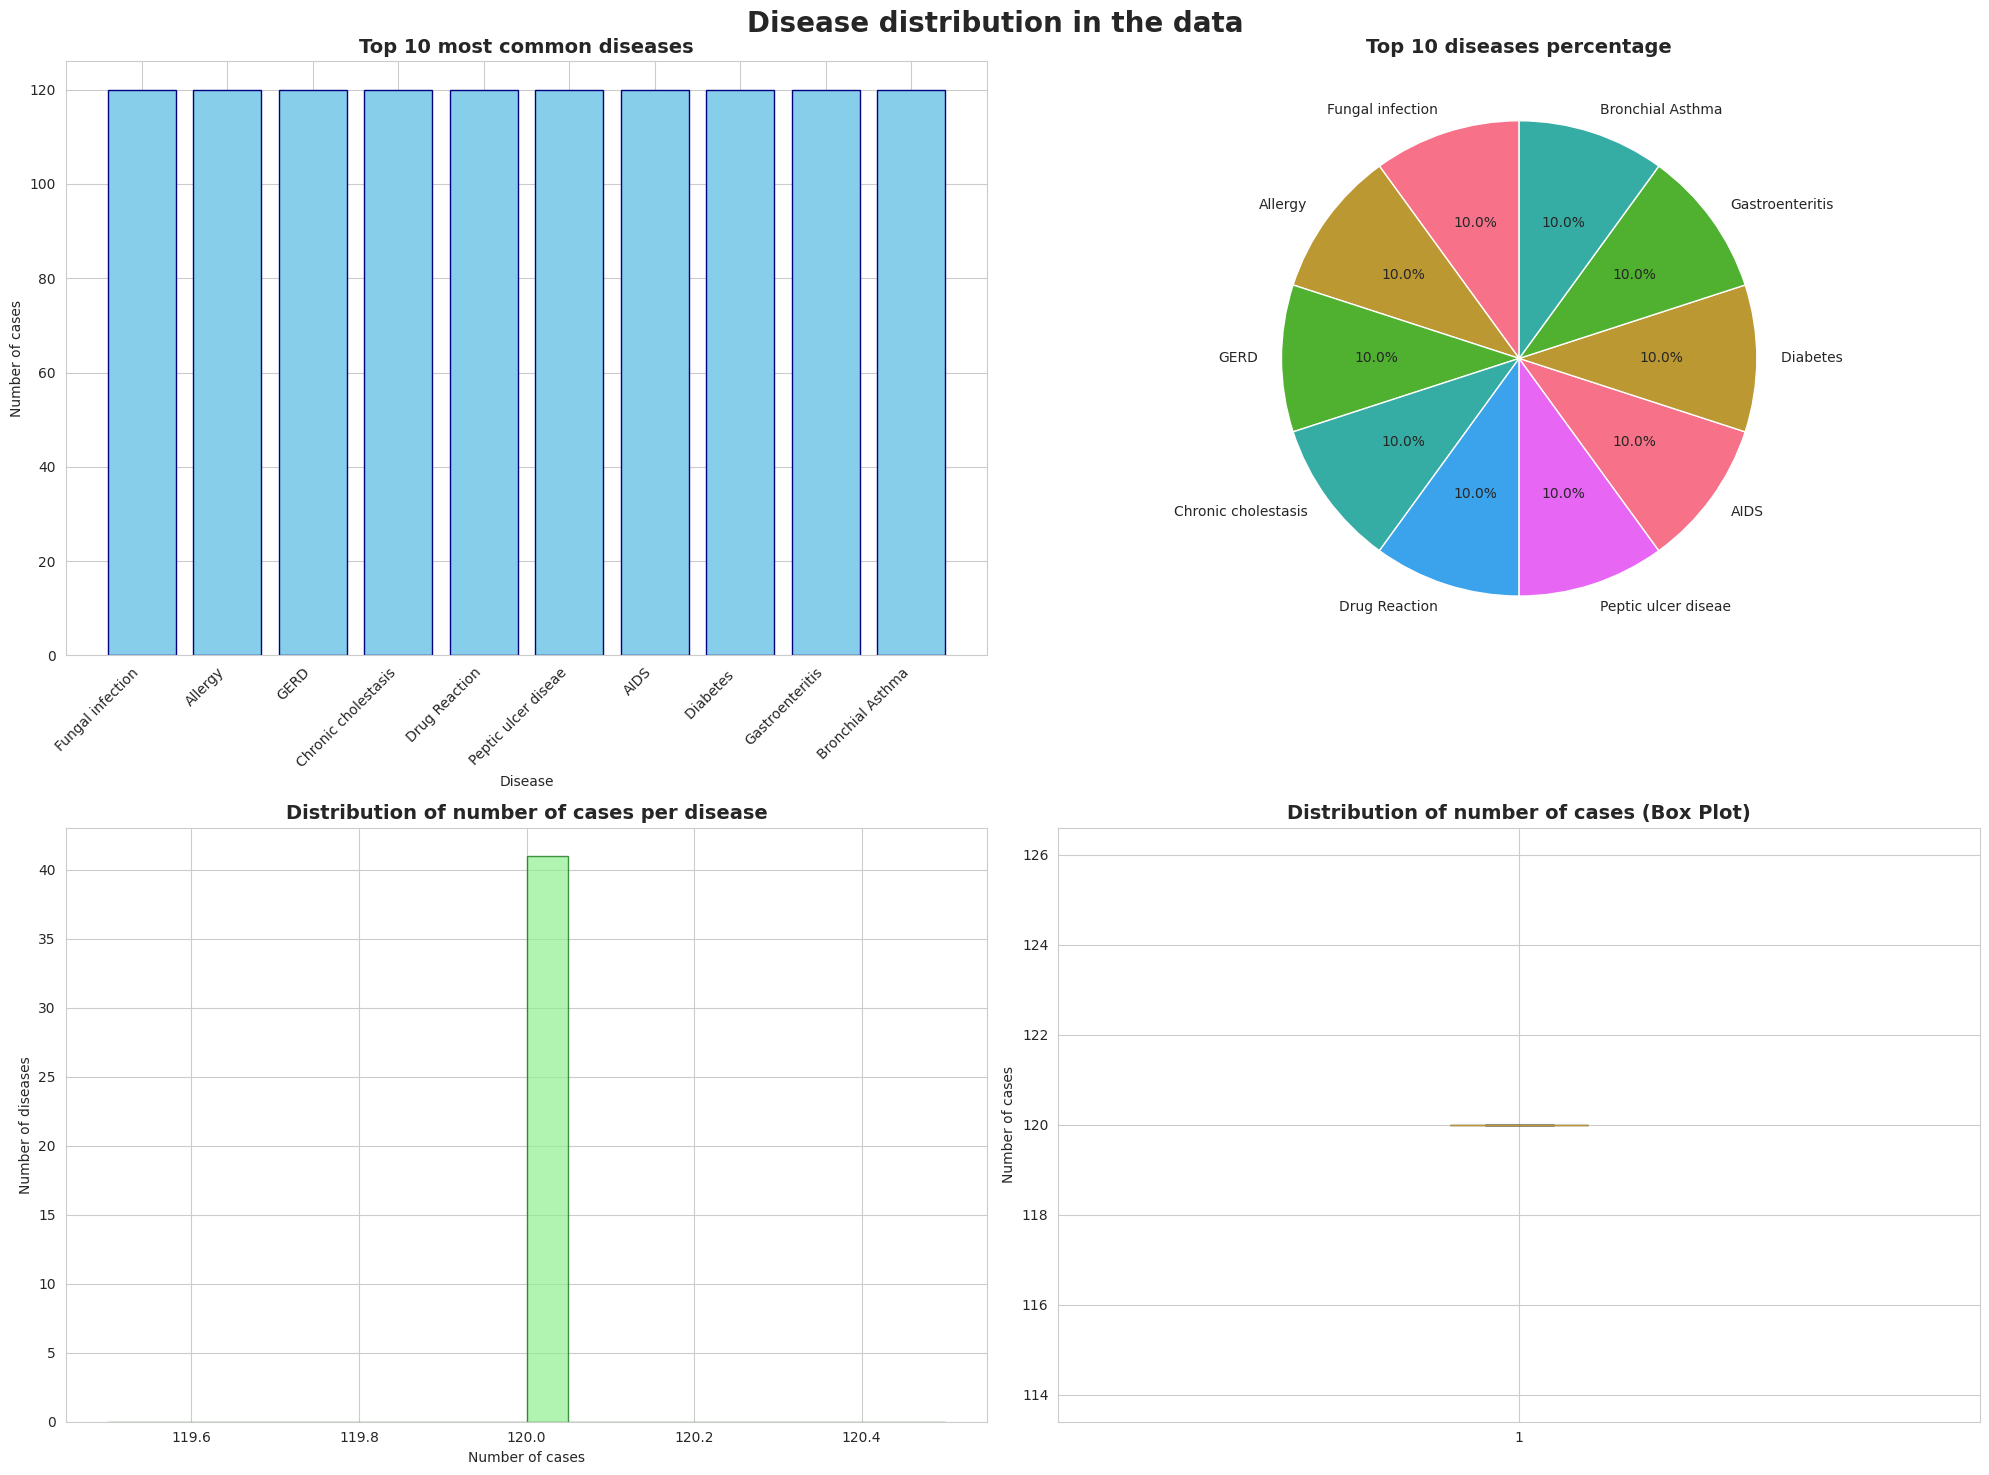

✅ Saved plot in disease_distribution.png
🔍 Creating symptom analysis plots...


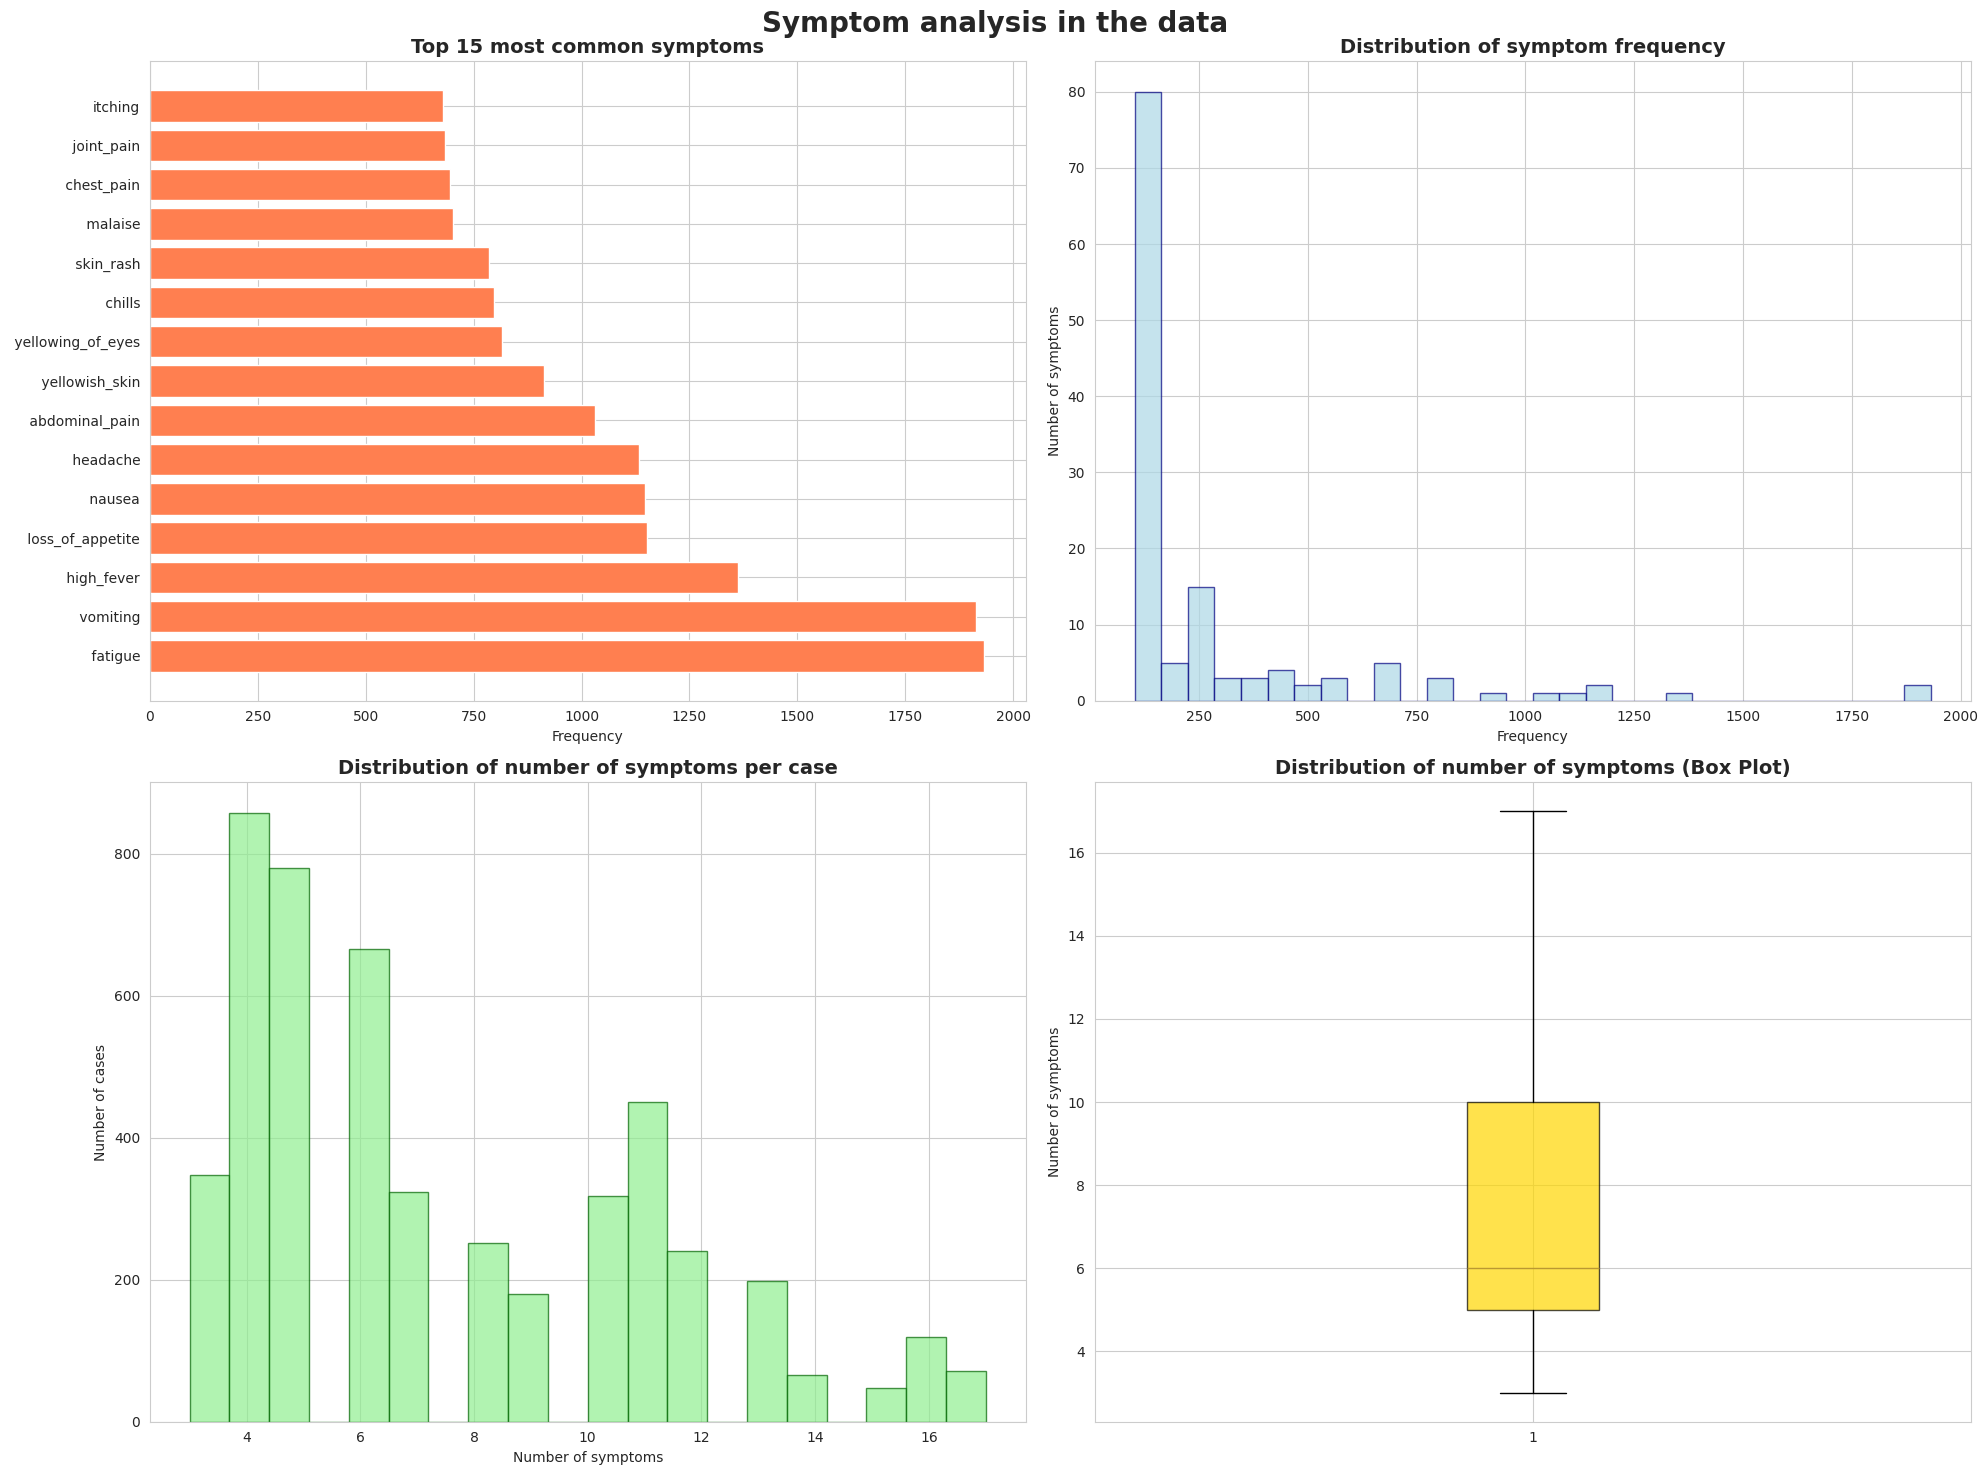

✅ Saved plot in symptom_analysis.png
🔥 Creating correlation heatmap...


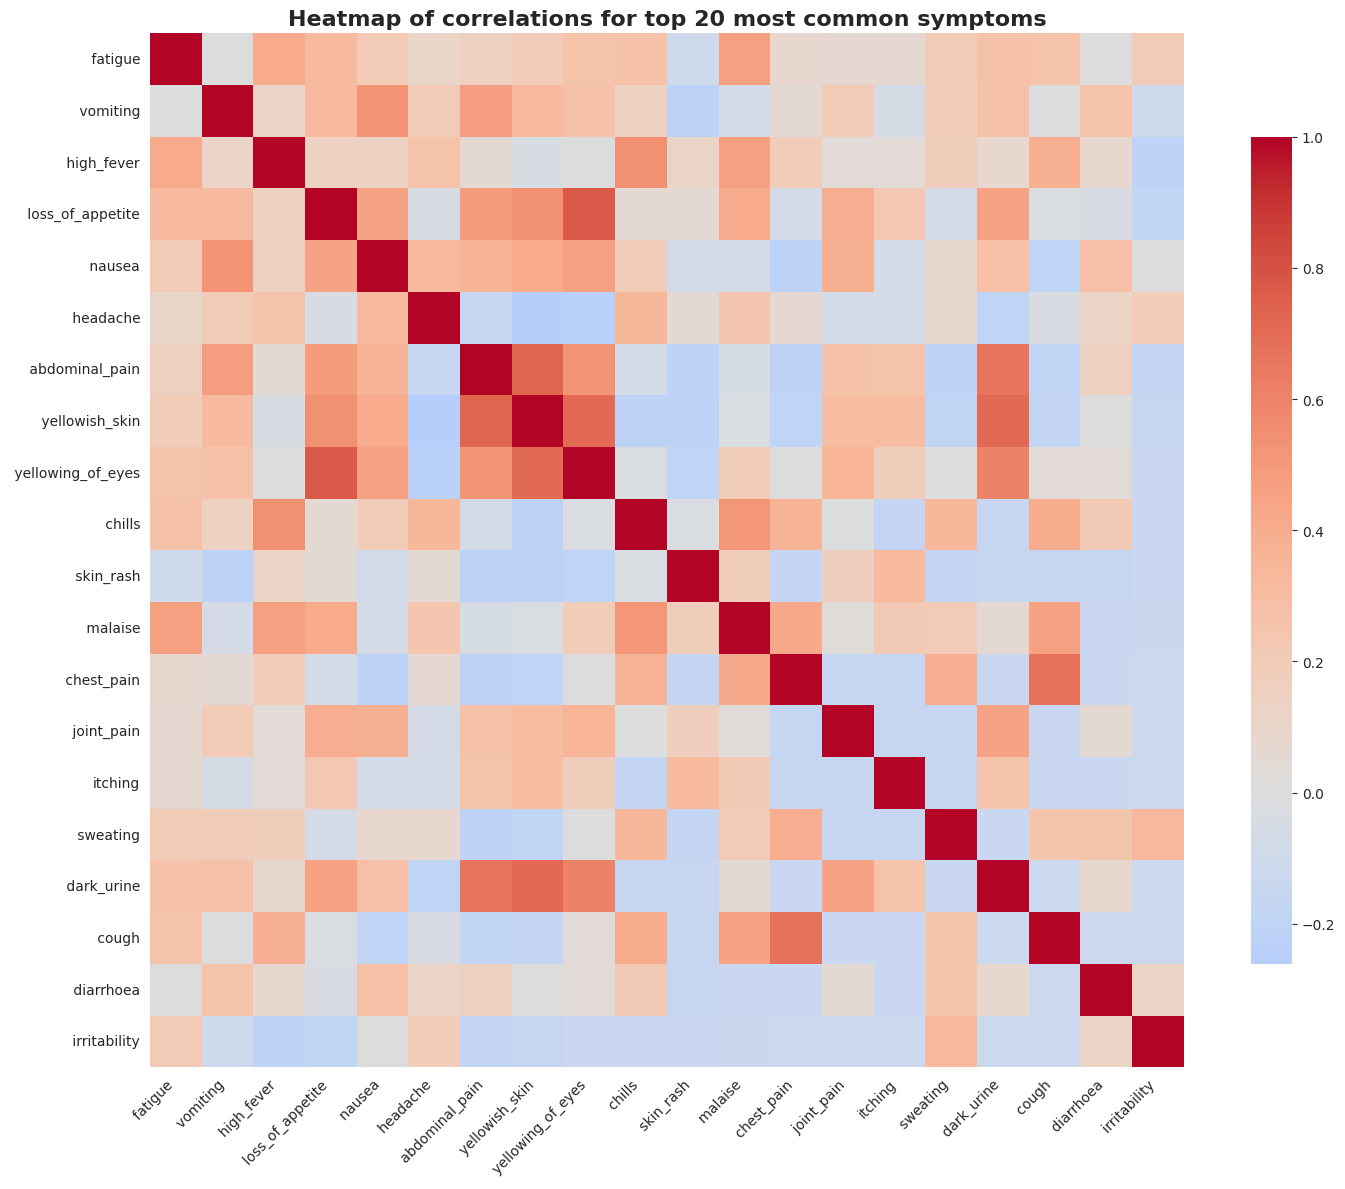

✅ Saved plot in symptom_correlation_heatmap.png
📊 Creating interactive dashboard...
✅ Saved interactive dashboard in interactive_dashboard.html
✅ Created all plots and dashboards!

🎉 Finished creating all plots and dashboards!


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.offline as pyo
import warnings
warnings.filterwarnings('ignore')

# Set configurations
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")
sns.set_palette("husl")

class DiseaseVisualizationDashboard:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = None
        self.symptom_columns = []
        self.disease_counts = None
        self.symptom_counts = None

    def load_data(self):
        """Load data"""
        print("🔄 Loading data...")
        self.df = pd.read_csv(self.file_path)
        print(f"✅ Loaded {len(self.df)} medical cases")

        # Prepare data for visualization
        self._prepare_data()
        return self.df

    def _prepare_data(self):
        """Prepare data for visualization"""
        # Analyze diseases
        self.disease_counts = self.df['Disease'].value_counts()

        # Analyze symptoms
        all_symptoms = []
        for col in self.df.columns[1:]:
            symptoms = self.df[col].dropna().tolist()
            all_symptoms.extend(symptoms)

        self.symptom_counts = Counter(all_symptoms)
        self.symptom_columns = sorted(list(set(all_symptoms)))

        # Number of symptoms per case
        self.symptoms_per_case = self.df.iloc[:, 1:].notna().sum(axis=1)

    def create_disease_distribution_plots(self):
        """Create disease distribution plots"""
        print("📊 Creating disease distribution plots...")

        fig, axes = plt.subplots(2, 2, figsize=(20, 15))
        fig.suptitle('Disease distribution in the data', fontsize=20, fontweight='bold')

        # 1. Bar chart for top 10 diseases
        top_10_diseases = self.disease_counts.head(10)
        axes[0, 0].bar(range(len(top_10_diseases)), top_10_diseases.values, color='skyblue', edgecolor='navy')
        axes[0, 0].set_title('Top 10 most common diseases', fontsize=14, fontweight='bold')
        axes[0, 0].set_xlabel('Disease')
        axes[0, 0].set_ylabel('Number of cases')
        axes[0, 0].set_xticks(range(len(top_10_diseases)))
        axes[0, 0].set_xticklabels(top_10_diseases.index, rotation=45, ha='right')

        # 2. Pie chart for top 10 diseases
        axes[0, 1].pie(top_10_diseases.values, labels=top_10_diseases.index, autopct='%1.1f%%', startangle=90)
        axes[0, 1].set_title('Top 10 diseases percentage', fontsize=14, fontweight='bold')

        # 3. Distribution of number of cases per disease
        axes[1, 0].hist(self.disease_counts.values, bins=20, color='lightgreen', edgecolor='darkgreen', alpha=0.7)
        axes[1, 0].set_title('Distribution of number of cases per disease', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Number of cases')
        axes[1, 0].set_ylabel('Number of diseases')

        # 4. Box plot for number of cases
        axes[1, 1].boxplot(self.disease_counts.values, patch_artist=True,
                          boxprops=dict(facecolor='lightcoral', alpha=0.7))
        axes[1, 1].set_title('Distribution of number of cases (Box Plot)', fontsize=14, fontweight='bold')
        axes[1, 1].set_ylabel('Number of cases')

        plt.tight_layout()
        plt.savefig('disease_distribution.png', dpi=300, bbox_inches='tight')
        plt.show()

        print("✅ Saved plot in disease_distribution.png")

    def create_symptom_analysis_plots(self):
        """Create symptom analysis plots"""
        print("🔍 Creating symptom analysis plots...")

        fig, axes = plt.subplots(2, 2, figsize=(20, 15))
        fig.suptitle('Symptom analysis in the data', fontsize=20, fontweight='bold')

        # 1. Top 15 most common symptoms
        top_15_symptoms = dict(self.symptom_counts.most_common(15))
        axes[0, 0].barh(range(len(top_15_symptoms)), list(top_15_symptoms.values()), color='coral')
        axes[0, 0].set_title('Top 15 most common symptoms', fontsize=14, fontweight='bold')
        axes[0, 0].set_xlabel('Frequency')
        axes[0, 0].set_yticks(range(len(top_15_symptoms)))
        axes[0, 0].set_yticklabels(list(top_15_symptoms.keys()))

        # 2. Distribution of symptom frequency
        symptom_frequencies = list(self.symptom_counts.values())
        axes[0, 1].hist(symptom_frequencies, bins=30, color='lightblue', edgecolor='navy', alpha=0.7)
        axes[0, 1].set_title('Distribution of symptom frequency', fontsize=14, fontweight='bold')
        axes[0, 1].set_xlabel('Frequency')
        axes[0, 1].set_ylabel('Number of symptoms')

        # 3. Number of symptoms per case
        axes[1, 0].hist(self.symptoms_per_case, bins=20, color='lightgreen', edgecolor='darkgreen', alpha=0.7)
        axes[1, 0].set_title('Distribution of number of symptoms per case', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Number of symptoms')
        axes[1, 0].set_ylabel('Number of cases')

        # 4. Box plot for number of symptoms
        axes[1, 1].boxplot(self.symptoms_per_case, patch_artist=True,
                          boxprops=dict(facecolor='gold', alpha=0.7))
        axes[1, 1].set_title('Distribution of number of symptoms (Box Plot)', fontsize=14, fontweight='bold')
        axes[1, 1].set_ylabel('Number of symptoms')

        plt.tight_layout()
        plt.savefig('symptom_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

        print("✅ Saved plot in symptom_analysis.png")

    def create_correlation_heatmap(self):
        """Create correlation heatmap"""
        print("🔥 Creating correlation heatmap...")

        # Create binary matrix for symptoms
        symptom_matrix = np.zeros((len(self.df), len(self.symptom_columns)))

        for idx, row in self.df.iterrows():
            for col in self.df.columns[1:]:
                symptom = row[col]
                if pd.notna(symptom) and symptom in self.symptom_columns:
                    symptom_idx = self.symptom_columns.index(symptom)
                    symptom_matrix[idx, symptom_idx] = 1

        # Calculate correlation between top 20 most common symptoms
        top_20_symptoms = [symptom for symptom, _ in self.symptom_counts.most_common(20)]
        top_20_indices = [self.symptom_columns.index(symptom) for symptom in top_20_symptoms]

        correlation_matrix = np.corrcoef(symptom_matrix[:, top_20_indices].T)

        plt.figure(figsize=(15, 12))
        sns.heatmap(correlation_matrix,
                   xticklabels=top_20_symptoms,
                   yticklabels=top_20_symptoms,
                   cmap='coolwarm',
                   center=0,
                   square=True,
                   cbar_kws={'shrink': 0.8})

        plt.title('Heatmap of correlations for top 20 most common symptoms', fontsize=16, fontweight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.savefig('symptom_correlation_heatmap.png', dpi=300, bbox_inches='tight')
        plt.show()

        print("✅ Saved plot in symptom_correlation_heatmap.png")

    def create_interactive_dashboard(self):
        """Create interactive dashboard using Plotly"""
        print("📊 Creating interactive dashboard...")

        # Create subplots
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=('Disease distribution', 'Symptom distribution', 'Number of symptoms per case', 'Top symptoms'),
            specs=[[{"type": "bar"}, {"type": "bar"}],
                   [{"type": "histogram"}, {"type": "bar"}]]
        )

        # 1. Disease distribution (Top 10)
        top_10_diseases = self.disease_counts.head(10)
        fig.add_trace(
            go.Bar(x=top_10_diseases.index, y=top_10_diseases.values, name="Diseases"),
            row=1, col=1
        )

        # 2. Symptom distribution (Top 15)
        top_15_symptoms = dict(self.symptom_counts.most_common(15))
        fig.add_trace(
            go.Bar(x=list(top_15_symptoms.keys()), y=list(top_15_symptoms.values()), name="Symptoms"),
            row=1, col=2
        )

        # 3. Distribution of number of symptoms
        fig.add_trace(
            go.Histogram(x=self.symptoms_per_case, name="Number of symptoms", nbinsx=20),
            row=2, col=1
        )

        # 4. Top symptoms (Top 10)
        top_10_symptoms = dict(self.symptom_counts.most_common(10))
        fig.add_trace(
            go.Bar(x=list(top_10_symptoms.keys()), y=list(top_10_symptoms.values()), name="Top symptoms"),
            row=2, col=2
        )

        # Update layout
        fig.update_layout(
            title_text="Comprehensive dashboard for disease prediction data",
            title_x=0.5,
            showlegend=False,
            height=800
        )

        # Save as interactive HTML file
        pyo.plot(fig, filename='interactive_dashboard.html', auto_open=False)
        print("✅ Saved interactive dashboard in interactive_dashboard.html")

        return fig

    def create_model_performance_plots(self, model_results):
        """Create model performance plots"""
        print("📈 Creating model performance plots...")

        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        fig.suptitle('Performance of different models', fontsize=16, fontweight='bold')

        # Extract data
        model_names = list(model_results.keys())
        accuracies = [model_results[name]['accuracy'] for name in model_names]
        cv_means = [model_results[name]['cv_mean'] for name in model_names]
        cv_stds = [model_results[name]['cv_std'] for name in model_names]

        # 1. Compare model accuracies
        bars = axes[0].bar(model_names, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
        axes[0].set_title('Model accuracy', fontsize=14, fontweight='bold')
        axes[0].set_ylabel('Accuracy')
        axes[0].set_ylim(0, 1.1)

        # Add values on bars
        for bar, acc in zip(bars, accuracies):
            axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                        f'{acc:.3f}', ha='center', va='bottom')

        # 2. Compare Cross-validation
        x_pos = np.arange(len(model_names))
        axes[1].bar(x_pos, cv_means, yerr=cv_stds, capsize=5,
                   color=['skyblue', 'lightcoral', 'lightgreen', 'gold'], alpha=0.7)
        axes[1].set_title('Cross-Validation Scores', fontsize=14, fontweight='bold')
        axes[1].set_ylabel('CV Score')
        axes[1].set_xticks(x_pos)
        axes[1].set_xticklabels(model_names, rotation=45)
        axes[1].set_ylim(0, 1.1)

        # Add values on bars
        for i, (mean, std) in enumerate(zip(cv_means, cv_stds)):
            axes[1].text(i, mean + std + 0.01, f'{mean:.3f}±{std:.3f}',
                        ha='center', va='bottom')

        plt.tight_layout()
        plt.savefig('model_performance.png', dpi=300, bbox_inches='tight')
        plt.show()

        print("✅ Saved plot in model_performance.png")

    def create_feature_importance_plot(self, feature_importances, feature_names, top_n=20):
        """Create feature importance plot"""
        print("🔍 Creating feature importance plot...")

        # Get top features
        indices = np.argsort(feature_importances)[::-1][:top_n]

        plt.figure(figsize=(12, 8))
        bars = plt.barh(range(len(indices)), feature_importances[indices], color='lightcoral')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel('Feature importance')
        plt.title(f'Top {top_n} symptoms in prediction', fontsize=16, fontweight='bold')
        plt.gca().invert_yaxis()

        # Add values on bars
        for i, (bar, importance) in enumerate(zip(bars, feature_importances[indices])):
            plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
                    f'{importance:.4f}', ha='left', va='center')

        plt.tight_layout()
        plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
        plt.show()

        print("✅ Saved plot in feature_importance.png")

    def create_comprehensive_dashboard(self):
        """Create comprehensive dashboard"""
        print("🎨 Creating comprehensive dashboard...")

        # Load data
        self.load_data()

        # Create all plots
        self.create_disease_distribution_plots()
        self.create_symptom_analysis_plots()
        self.create_correlation_heatmap()
        self.create_interactive_dashboard()

        print("✅ Created all plots and dashboards!")

def main():
    """Main function"""
    print("📊 Disease prediction data visualization dashboard")
    print("=" * 60)

    # Create dashboard
    dashboard = DiseaseVisualizationDashboard('/content/DiseaseAndSymptoms.csv')

    # Create comprehensive dashboard
    dashboard.create_comprehensive_dashboard()

    print("\n🎉 Finished creating all plots and dashboards!")

if __name__ == "__main__":
    main()


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.offline as pyo
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

class InteractiveDiseasePlots:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = None
        self.symptom_columns = []
        self.disease_counts = None
        self.symptom_counts = None

    def load_data(self):
        """تحميل البيانات"""
        print("🔄 جاري تحميل البيانات...")
        self.df = pd.read_csv(self.file_path)
        print(f"✅ تم تحميل {len(self.df)} حالة مرضية")

        # تحضير البيانات
        self._prepare_data()
        return self.df

    def _prepare_data(self):
        """تحضير البيانات للتصور"""
        # تحليل الأمراض
        self.disease_counts = self.df['Disease'].value_counts()

        # تحليل الأعراض
        all_symptoms = []
        for col in self.df.columns[1:]:
            symptoms = self.df[col].dropna().tolist()
            all_symptoms.extend(symptoms)

        self.symptom_counts = Counter(all_symptoms)
        self.symptom_columns = sorted(list(set(all_symptoms)))

        # عدد الأعراض لكل حالة
        self.symptoms_per_case = self.df.iloc[:, 1:].notna().sum(axis=1)

    def create_disease_sunburst_chart(self):
        """إنشاء مخطط Sunburst للأمراض"""
        print("☀️ إنشاء مخطط Sunburst للأمراض...")

        # تحضير البيانات
        disease_data = []
        for disease, count in self.disease_counts.items():
            disease_data.append({
                'ids': disease,
                'labels': disease,
                'parents': '',
                'values': count
            })

        # إنشاء المخطط
        fig = go.Figure(go.Sunburst(
            ids=[d['ids'] for d in disease_data],
            labels=[d['labels'] for d in disease_data],
            parents=[d['parents'] for d in disease_data],
            values=[d['values'] for d in disease_data],
            branchvalues="total",
            hovertemplate='<b>%{label}</b><br>عدد الحالات: %{value}<extra></extra>'
        ))

        fig.update_layout(
            title="توزيع الأمراض - مخطط Sunburst",
            font_size=12,
            height=600
        )

        # حفظ المخطط
        pyo.plot(fig, filename='disease_sunburst.html', auto_open=False)
        print("✅ تم حفظ المخطط في disease_sunburst.html")

        return fig

    def create_symptom_network_graph(self):
        """إنشاء مخطط شبكة للأعراض"""
        print("🕸️ إنشاء مخطط شبكة للأعراض...")

        # الحصول على الأعراض الأكثر شيوعاً
        top_20_symptoms = [symptom for symptom, _ in self.symptom_counts.most_common(20)]

        # إنشاء مصفوفة الارتباط
        symptom_matrix = np.zeros((len(self.df), len(self.symptom_columns)))

        for idx, row in self.df.iterrows():
            for col in self.df.columns[1:]:
                symptom = row[col]
                if pd.notna(symptom) and symptom in self.symptom_columns:
                    symptom_idx = self.symptom_columns.index(symptom)
                    symptom_matrix[idx, symptom_idx] = 1

        # حساب الارتباط
        top_20_indices = [self.symptom_columns.index(symptom) for symptom in top_20_symptoms]
        correlation_matrix = np.corrcoef(symptom_matrix[:, top_20_indices].T)

        # إنشاء قائمة الروابط
        links = []
        for i in range(len(top_20_symptoms)):
            for j in range(i+1, len(top_20_symptoms)):
                if correlation_matrix[i, j] > 0.1:  # فقط الارتباطات القوية
                    links.append({
                        'source': i,
                        'target': j,
                        'value': correlation_matrix[i, j]
                    })

        # إنشاء المخطط
        fig = go.Figure(data=[go.Sankey(
            node=dict(
                pad=15,
                thickness=20,
                line=dict(color="black", width=0.5),
                label=top_20_symptoms,
                color="blue"
            ),
            link=dict(
                source=[link['source'] for link in links],
                target=[link['target'] for link in links],
                value=[link['value'] for link in links]
            )
        )])

        fig.update_layout(
            title="شبكة ارتباط الأعراض",
            font_size=12,
            height=600
        )

        # حفظ المخطط
        pyo.plot(fig, filename='symptom_network.html', auto_open=False)
        print("✅ تم حفظ المخطط في symptom_network.html")

        return fig

    def create_3d_scatter_plot(self):
        """إنشاء مخطط 3D scatter"""
        print("🎯 إنشاء مخطط 3D scatter...")

        # استخدام PCA لتقليل الأبعاد
        from sklearn.decomposition import PCA

        # إنشاء مصفوفة binary للأعراض
        symptom_matrix = np.zeros((len(self.df), len(self.symptom_columns)))

        for idx, row in self.df.iterrows():
            for col in self.df.columns[1:]:
                symptom = row[col]
                if pd.notna(symptom) and symptom in self.symptom_columns:
                    symptom_idx = self.symptom_columns.index(symptom)
                    symptom_matrix[idx, symptom_idx] = 1

        # تطبيق PCA
        pca = PCA(n_components=3)
        pca_result = pca.fit_transform(symptom_matrix)

        # إنشاء DataFrame للنتائج
        pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])
        pca_df['Disease'] = self.df['Disease']

        # إنشاء المخطط
        fig = px.scatter_3d(
            pca_df,
            x='PC1',
            y='PC2',
            z='PC3',
            color='Disease',
            title='تصور البيانات في 3D (PCA)',
            hover_data=['Disease']
        )

        fig.update_layout(height=600)

        # حفظ المخطط
        pyo.plot(fig, filename='3d_scatter_plot.html', auto_open=False)
        print("✅ تم حفظ المخطط في 3d_scatter_plot.html")

        return fig

    def create_animated_plots(self):
        """إنشاء رسوم متحركة"""
        print("🎬 إنشاء رسوم متحركة...")

        # تحضير البيانات للرسوم المتحركة
        disease_data = []
        for disease, count in self.disease_counts.items():
            disease_data.append({
                'Disease': disease,
                'Count': count,
                'Year': 2024  # يمكن تغيير هذا لبيانات زمنية حقيقية
            })

        df_animated = pd.DataFrame(disease_data)

        # إنشاء مخطط متحرك
        fig = px.bar(
            df_animated,
            x='Disease',
            y='Count',
            title='توزيع الأمراض - رسم متحرك',
            animation_frame='Year',
            range_y=[0, df_animated['Count'].max() * 1.1]
        )

        fig.update_layout(
            height=600,
            xaxis_tickangle=-45
        )

        # حفظ المخطط
        pyo.plot(fig, filename='animated_diseases.html', auto_open=False)
        print("✅ تم حفظ المخطط في animated_diseases.html")

        return fig

    def create_heatmap_dashboard(self):
        """إنشاء لوحة تحكم بخريطة حرارية"""
        print("🔥 إنشاء لوحة تحكم بخريطة حرارية...")

        # إنشاء subplots
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=('ارتباط الأعراض', 'توزيع الأمراض', 'عدد الأعراض', 'أهم الأعراض'),
            specs=[[{"type": "heatmap"}, {"type": "bar"}],
                   [{"type": "histogram"}, {"type": "bar"}]]
        )

        # 1. خريطة حرارية لارتباط الأعراض
        top_15_symptoms = [symptom for symptom, _ in self.symptom_counts.most_common(15)]

        # إنشاء مصفوفة الارتباط
        symptom_matrix = np.zeros((len(self.df), len(self.symptom_columns)))

        for idx, row in self.df.iterrows():
            for col in self.df.columns[1:]:
                symptom = row[col]
                if pd.notna(symptom) and symptom in self.symptom_columns:
                    symptom_idx = self.symptom_columns.index(symptom)
                    symptom_matrix[idx, symptom_idx] = 1

        top_15_indices = [self.symptom_columns.index(symptom) for symptom in top_15_symptoms]
        correlation_matrix = np.corrcoef(symptom_matrix[:, top_15_indices].T)

        fig.add_trace(
            go.Heatmap(
                z=correlation_matrix,
                x=top_15_symptoms,
                y=top_15_symptoms,
                colorscale='RdBu',
                zmid=0
            ),
            row=1, col=1
        )

        # 2. توزيع الأمراض
        top_10_diseases = self.disease_counts.head(10)
        fig.add_trace(
            go.Bar(x=top_10_diseases.index, y=top_10_diseases.values, name="الأمراض"),
            row=1, col=2
        )

        # 3. توزيع عدد الأعراض
        fig.add_trace(
            go.Histogram(x=self.symptoms_per_case, name="عدد الأعراض", nbinsx=20),
            row=2, col=1
        )

        # 4. أهم الأعراض
        top_10_symptoms = dict(self.symptom_counts.most_common(10))
        fig.add_trace(
            go.Bar(x=list(top_10_symptoms.keys()), y=list(top_10_symptoms.values()), name="أهم الأعراض"),
            row=2, col=2
        )

        # تحديث التخطيط
        fig.update_layout(
            title_text="لوحة تحكم تفاعلية شاملة",
            title_x=0.5,
            showlegend=False,
            height=800
        )

        # حفظ المخطط
        pyo.plot(fig, filename='heatmap_dashboard.html', auto_open=False)
        print("✅ تم حفظ المخطط في heatmap_dashboard.html")

        return fig

    def create_all_interactive_plots(self):
        """إنشاء جميع الرسوم التفاعلية"""
        print("🎨 إنشاء جميع الرسوم التفاعلية...")

        # تحميل البيانات
        self.load_data()

        # إنشاء الرسوم
        self.create_disease_sunburst_chart()
        self.create_symptom_network_graph()
        self.create_3d_scatter_plot()
        self.create_animated_plots()
        self.create_heatmap_dashboard()

        print("✅ تم إنشاء جميع الرسوم التفاعلية!")

def main():
    """الدالة الرئيسية"""
    print("🎨 منشئ الرسوم التفاعلية لبيانات التنبؤ بالأمراض")
    print("=" * 60)

    # إنشاء الرسوم
    plotter = InteractiveDiseasePlots('/content/DiseaseAndSymptoms.csv')
    plotter.create_all_interactive_plots()

    print("\n🎉 تم الانتهاء من إنشاء جميع الرسوم التفاعلية!")

if __name__ == "__main__":
    main()

🎨 منشئ الرسوم التفاعلية لبيانات التنبؤ بالأمراض
🎨 إنشاء جميع الرسوم التفاعلية...
🔄 جاري تحميل البيانات...
✅ تم تحميل 4920 حالة مرضية
☀️ إنشاء مخطط Sunburst للأمراض...
✅ تم حفظ المخطط في disease_sunburst.html
🕸️ إنشاء مخطط شبكة للأعراض...
✅ تم حفظ المخطط في symptom_network.html
🎯 إنشاء مخطط 3D scatter...
✅ تم حفظ المخطط في 3d_scatter_plot.html
🎬 إنشاء رسوم متحركة...
✅ تم حفظ المخطط في animated_diseases.html
🔥 إنشاء لوحة تحكم بخريطة حرارية...
✅ تم حفظ المخطط في heatmap_dashboard.html
✅ تم إنشاء جميع الرسوم التفاعلية!

🎉 تم الانتهاء من إنشاء جميع الرسوم التفاعلية!


STATISTICAL. PLOTS
--

📊  Statistical Charts for Disease Prediction Data
📊Generating the comprehensive statistical analysis.
🔄 Data loading...
✅ 4920 Medical condition
📊 Generating Statistical analysis of distributions..


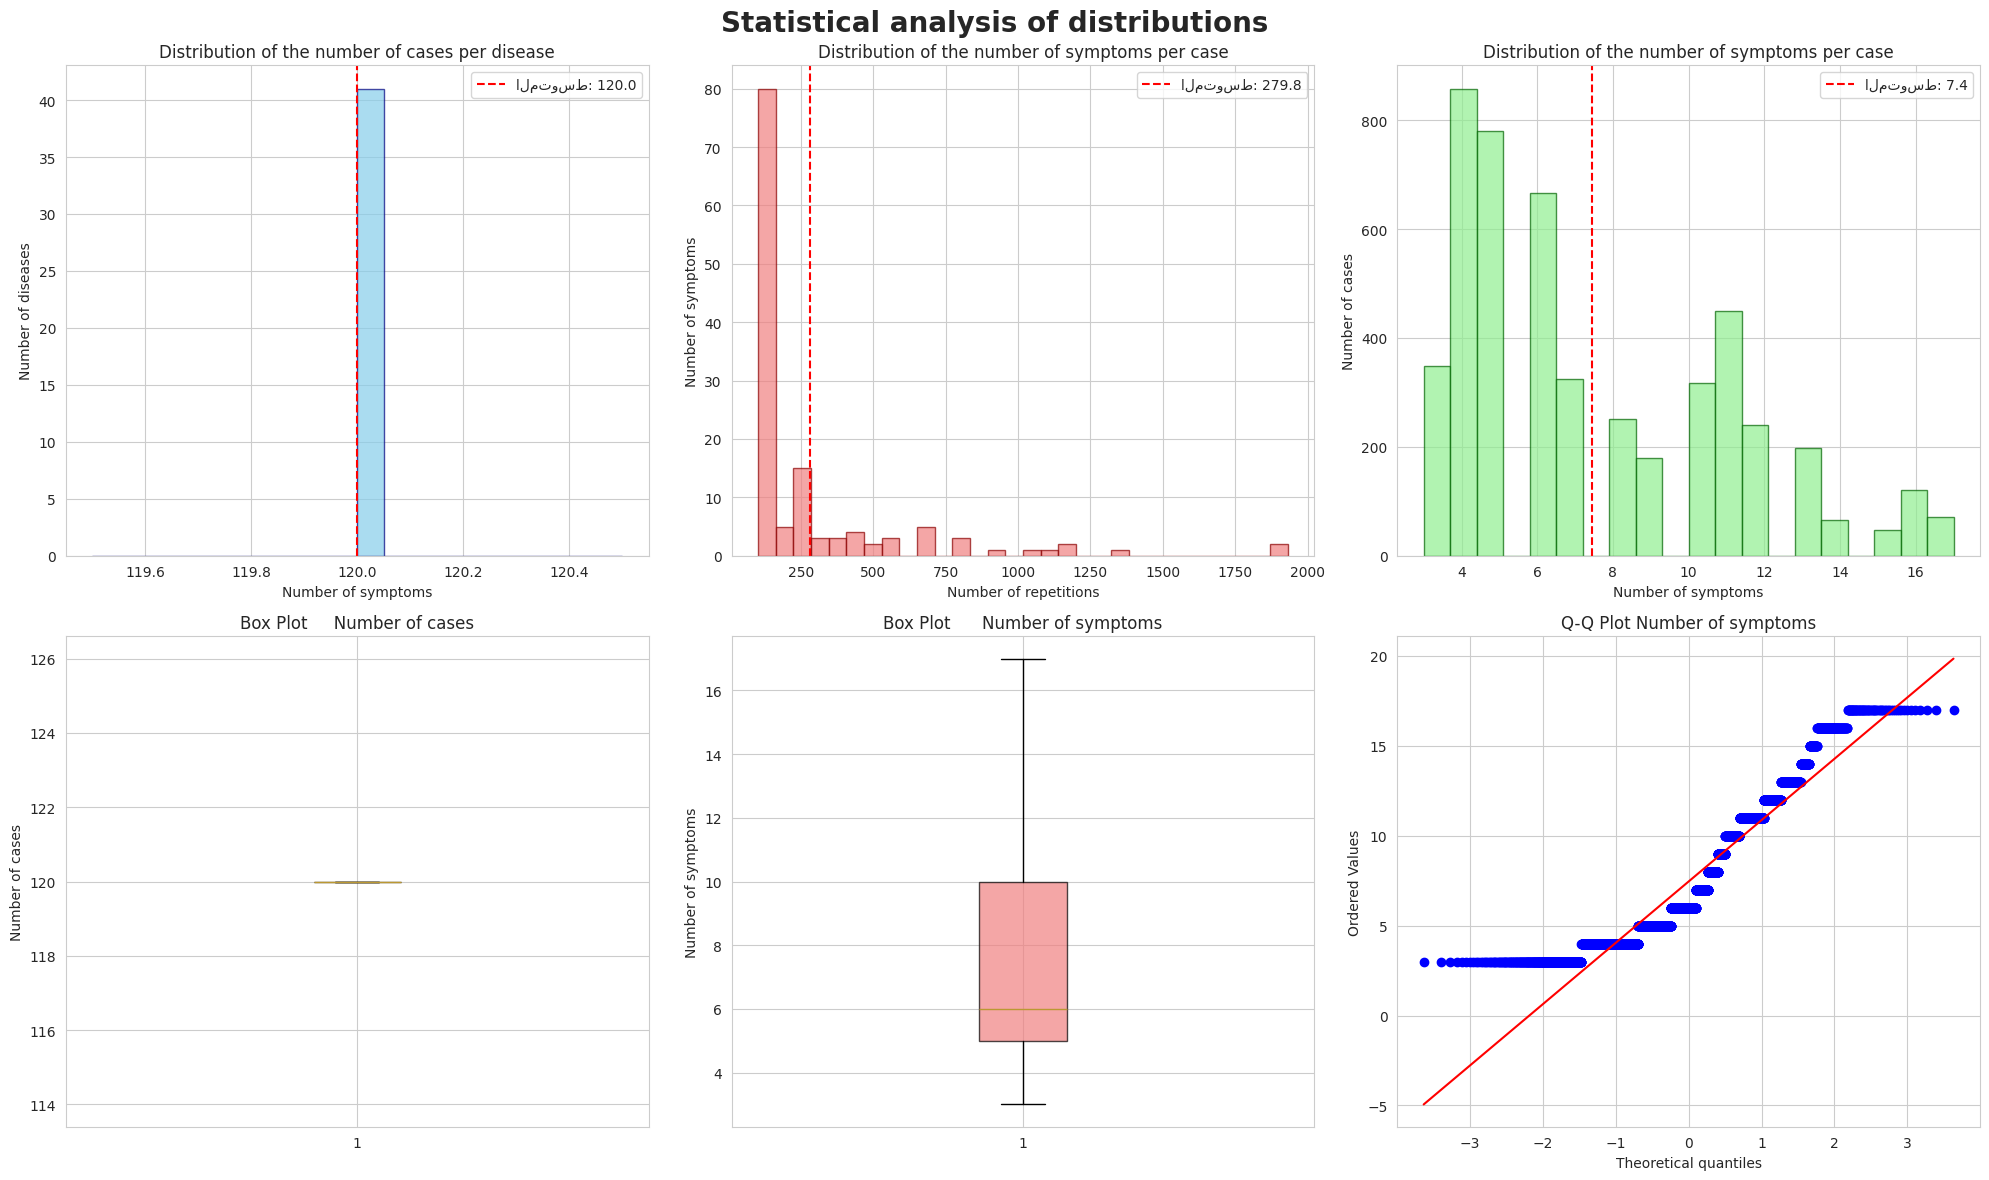

✅ statistical_distributions.png
🔗 Generating correlation analysis....


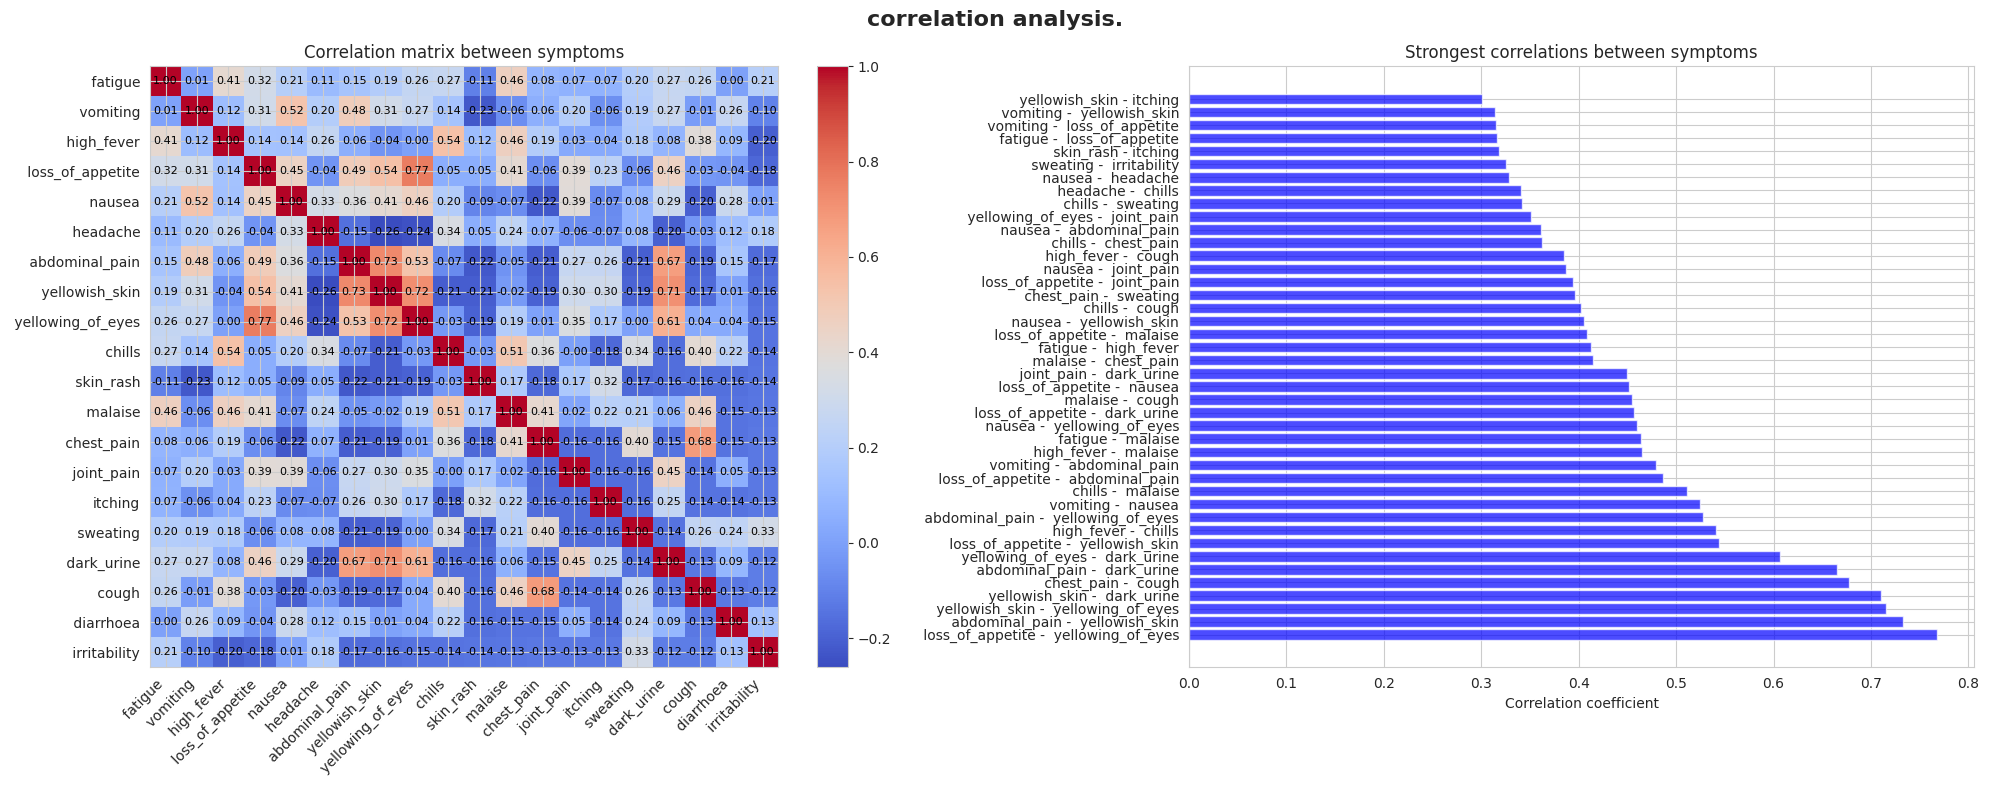

✅ correlation_analysis.png
📐Generating Dimensionality reduction and data clustering.


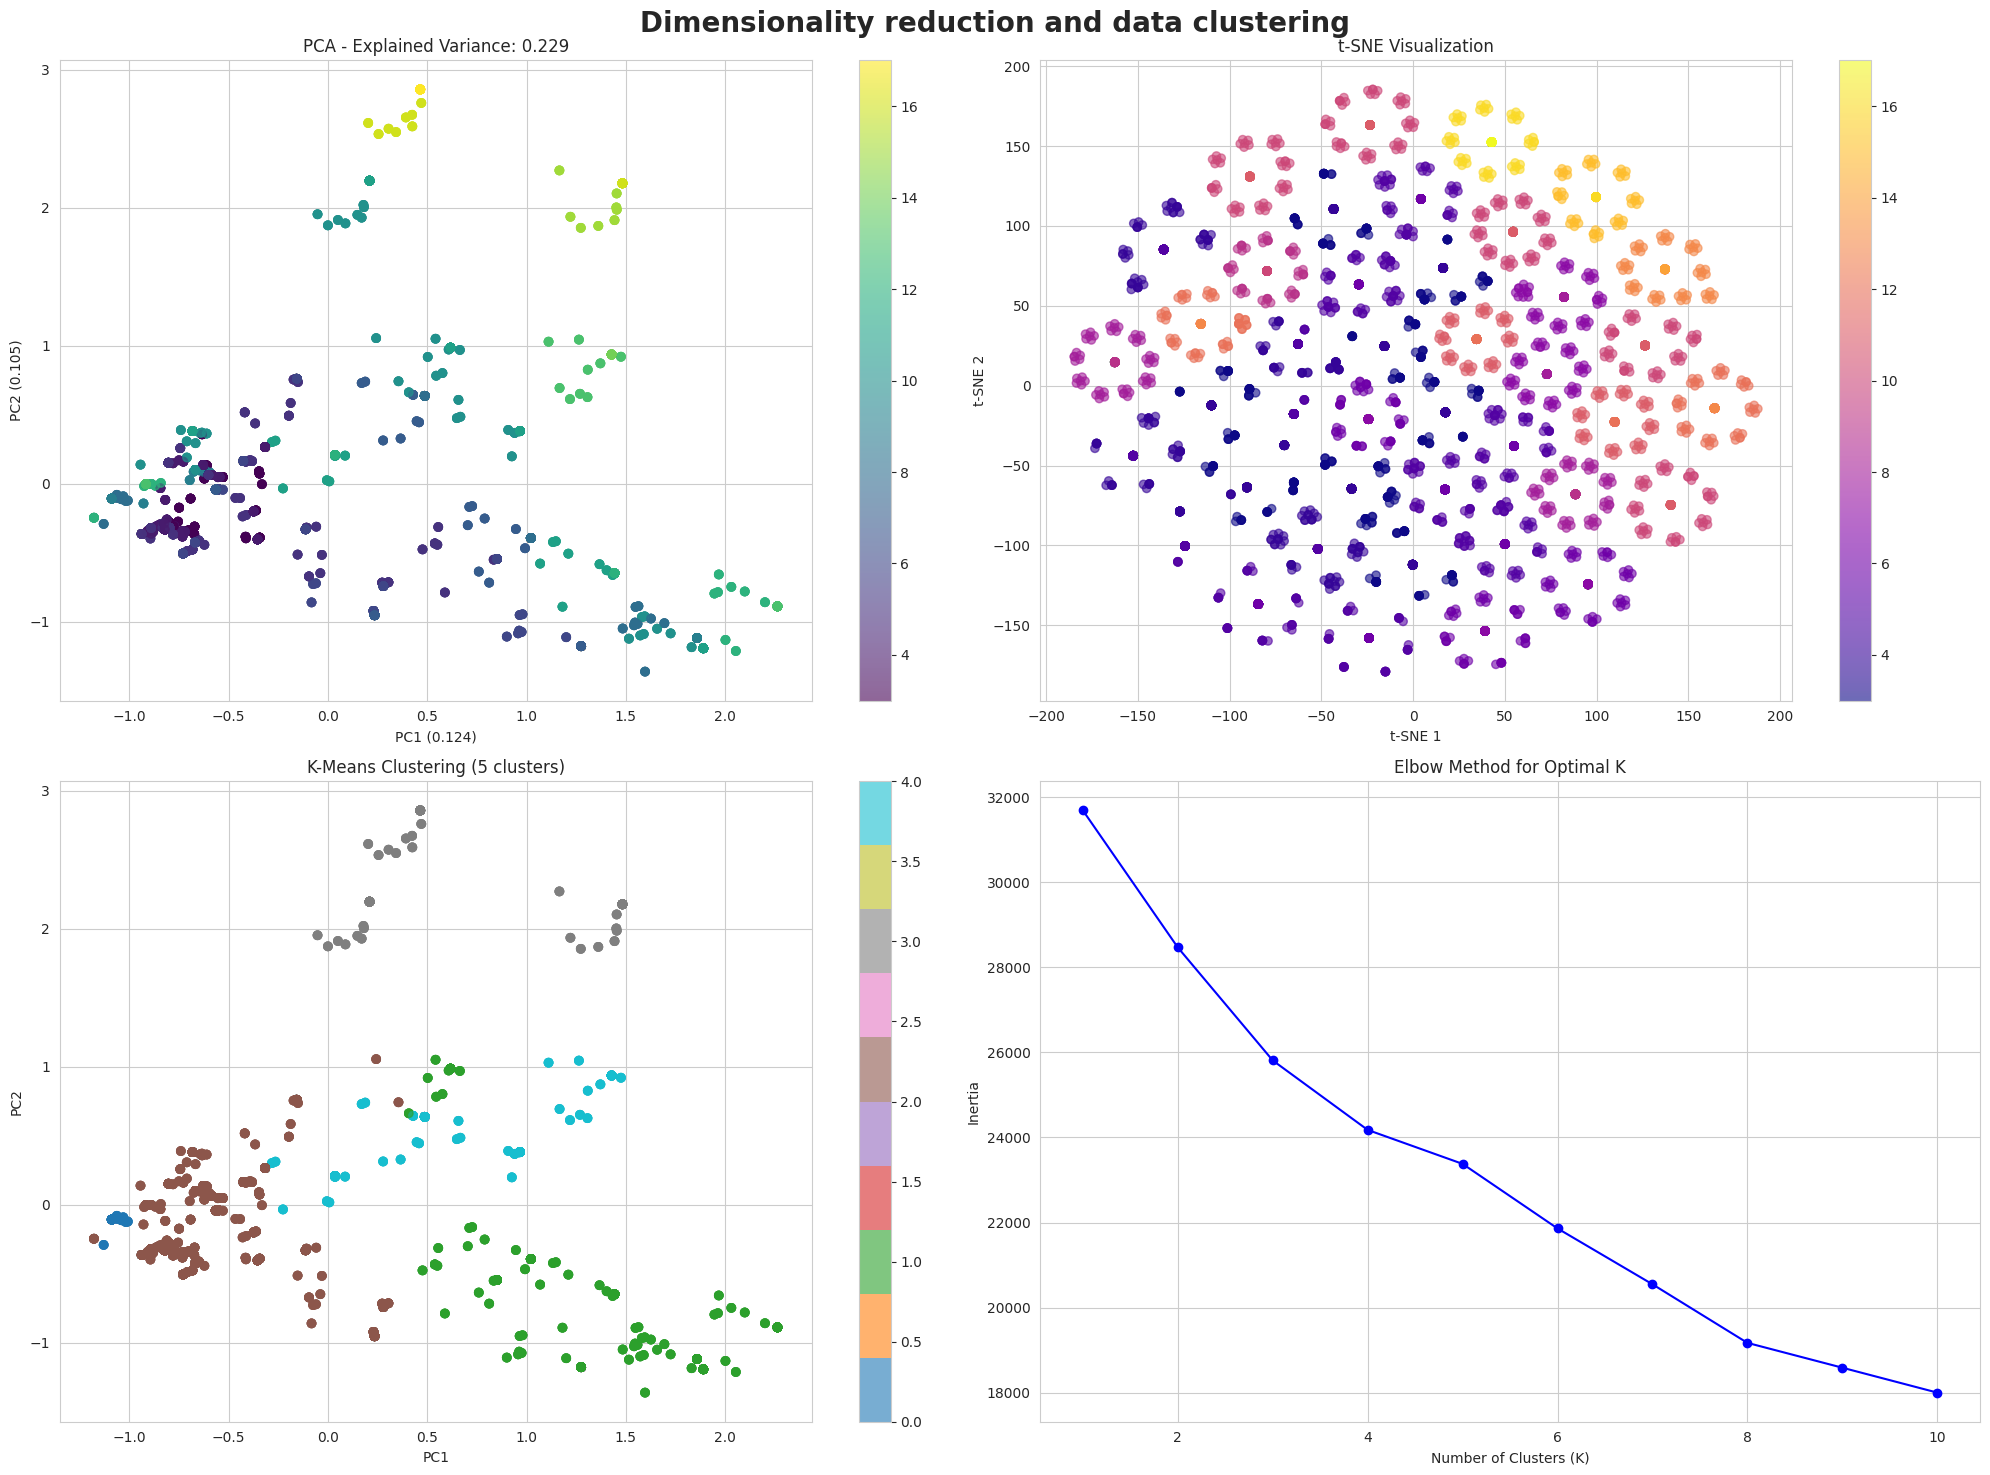

✅ dimensionality_reduction.png
🧪Generating Statistical tests.


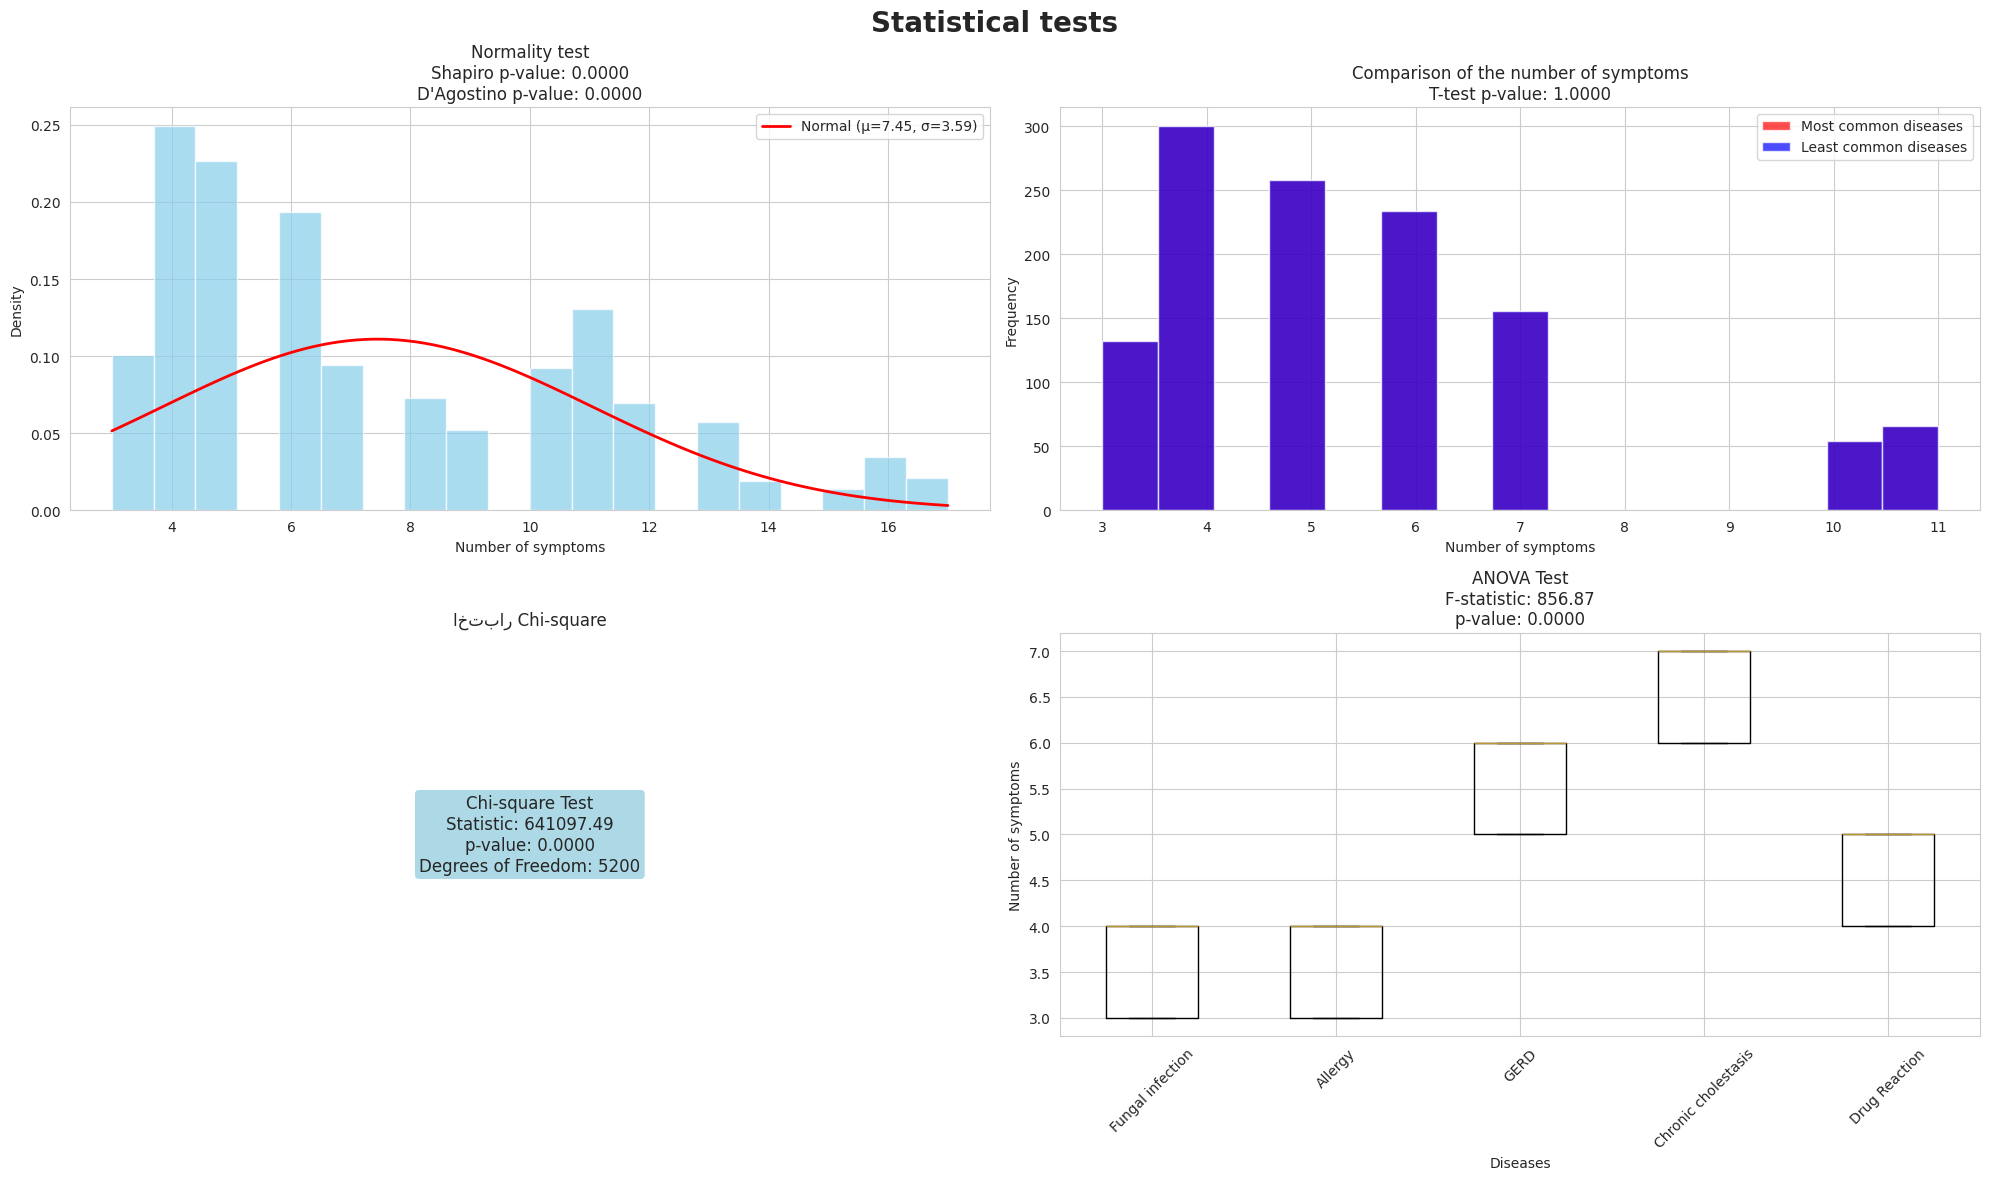

✅ statistical_tests.png
✅All the statistical charts have been created

🎉 All statistical charts have been completed


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from collections import Counter # Import Counter
import warnings
warnings.filterwarnings('ignore')

# تعيين الإعدادات
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")
sns.set_palette("husl")

class StatisticalDiseasePlots:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = None
        self.symptom_columns = []
        self.disease_counts = None
        self.symptom_counts = None
        self.symptom_matrix = None # Initialize symptom_matrix

    def load_data(self):
        """Data loading"""
        print("🔄 Data loading...")
        self.df = pd.read_csv(self.file_path)
        print(f"✅ {len(self.df)} Medical condition")

        # تحضير البيانات
        self._prepare_data()
        return self.df

    def _prepare_data(self):
        """Preparing data for statistical analysis"""
        # تحليل الأمراض
        self.disease_counts = self.df['Disease'].value_counts()

        # تحليل الأعراض
        all_symptoms = []
        for col in self.df.columns[1:]:
            symptoms = self.df[col].dropna().tolist()
            all_symptoms.extend(symptoms)

        self.symptom_counts = Counter(all_symptoms)
        self.symptom_columns = sorted(list(set(all_symptoms)))

        # عدد الأعراض لكل حالة
        self.symptoms_per_case = self.df.iloc[:, 1:].notna().sum(axis=1)

        # إنشاء مصفوفة binary للأعراض
        self.symptom_matrix = np.zeros((len(self.df), len(self.symptom_columns)))

        for idx, row in self.df.iterrows():
            for col in self.df.columns[1:]:
                symptom = row[col]
                if pd.notna(symptom) and symptom in self.symptom_columns:
                    symptom_idx = self.symptom_columns.index(symptom)
                    self.symptom_matrix[idx, symptom_idx] = 1

    def create_distribution_analysis(self):
        """Statistical analysis of distributions"""
        print("📊 Generating Statistical analysis of distributions..")

        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        fig.suptitle('Statistical analysis of distributions', fontsize=20, fontweight='bold')

        # 1. توزيع عدد الحالات لكل مرض
        axes[0, 0].hist(self.disease_counts.values, bins=20, color='skyblue', edgecolor='navy', alpha=0.7)
        axes[0, 0].set_title('Distribution of the number of cases per disease')
        axes[0, 0].set_xlabel('Number of symptoms')
        axes[0, 0].set_ylabel('Number of diseases')

        # إضافة خط المتوسط
        mean_cases = np.mean(self.disease_counts.values)
        axes[0, 0].axvline(mean_cases, color='red', linestyle='--', label=f'المتوسط: {mean_cases:.1f}')
        axes[0, 0].legend()

        # 2. توزيع تكرار الأعراض
        symptom_frequencies = list(self.symptom_counts.values())
        axes[0, 1].hist(symptom_frequencies, bins=30, color='lightcoral', edgecolor='darkred', alpha=0.7)
        axes[0, 1].set_title('Distribution of the number of symptoms per case')
        axes[0, 1].set_xlabel('Number of repetitions')
        axes[0, 1].set_ylabel('Number of symptoms')

        # إضافة خط المتوسط
        mean_freq = np.mean(symptom_frequencies)
        axes[0, 1].axvline(mean_freq, color='red', linestyle='--', label=f'المتوسط: {mean_freq:.1f}')
        axes[0, 1].legend()

        # 3. توزيع عدد الأعراض لكل حالة
        axes[0, 2].hist(self.symptoms_per_case, bins=20, color='lightgreen', edgecolor='darkgreen', alpha=0.7)
        axes[0, 2].set_title('Distribution of the number of symptoms per case')
        axes[0, 2].set_xlabel('Number of symptoms')
        axes[0, 2].set_ylabel('Number of cases')

        # إضافة خط المتوسط
        mean_symptoms = np.mean(self.symptoms_per_case)
        axes[0, 2].axvline(mean_symptoms, color='red', linestyle='--', label=f'المتوسط: {mean_symptoms:.1f}')
        axes[0, 2].legend()

        # 4. Box plot لعدد الحالات
        axes[1, 0].boxplot(self.disease_counts.values, patch_artist=True,
                          boxprops=dict(facecolor='lightblue', alpha=0.7))
        axes[1, 0].set_title('Box Plot     Number of cases')
        axes[1, 0].set_ylabel('Number of cases')

        # 5. Box plot لعدد الأعراض
        axes[1, 1].boxplot(self.symptoms_per_case, patch_artist=True,
                          boxprops=dict(facecolor='lightcoral', alpha=0.7))
        axes[1, 1].set_title('Box Plot      Number of symptoms')
        axes[1, 1].set_ylabel('Number of symptoms')

        # 6. Q-Q plot للتوزيع الطبيعي
        from scipy.stats import probplot
        probplot(self.symptoms_per_case, dist="norm", plot=axes[1, 2])
        axes[1, 2].set_title('Q-Q Plot Number of symptoms')
        axes[1, 2].grid(True)

        plt.tight_layout()
        plt.savefig('statistical_distributions.png', dpi=300, bbox_inches='tight')
        plt.show()

        print("✅ statistical_distributions.png")

    def create_correlation_analysis(self):
        """ correlation analysis..."""
        print("🔗 Generating correlation analysis....")

        # الحصول على الأعراض الأكثر شيوعاً
        top_20_symptoms = [symptom for symptom, _ in self.symptom_counts.most_common(20)]
        top_20_indices = [self.symptom_columns.index(symptom) for symptom in top_20_symptoms]

        # حساب مصفوفة الارتباط
        correlation_matrix = np.corrcoef(self.symptom_matrix[:, top_20_indices].T)

        fig, axes = plt.subplots(1, 2, figsize=(20, 8))
        fig.suptitle('correlation analysis.', fontsize=16, fontweight='bold')

        # 1. خريطة حرارية للارتباط
        im = axes[0].imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
        axes[0].set_title('Correlation matrix between symptoms')
        axes[0].set_xticks(range(len(top_20_symptoms)))
        axes[0].set_yticks(range(len(top_20_symptoms)))
        axes[0].set_xticklabels(top_20_symptoms, rotation=45, ha='right')
        axes[0].set_yticklabels(top_20_symptoms)

        # إضافة قيم الارتباط
        for i in range(len(top_20_symptoms)):
            for j in range(len(top_20_symptoms)):
                text = axes[0].text(j, i, f'{correlation_matrix[i, j]:.2f}',
                                  ha="center", va="center", color="black", fontsize=8)

        # إضافة شريط الألوان
        plt.colorbar(im, ax=axes[0])

        # 2. مخطط الارتباط المباشر
        # إيجاد أقوى الارتباطات
        strong_correlations = []
        for i in range(len(top_20_symptoms)):
            for j in range(i+1, len(top_20_symptoms)):
                corr = correlation_matrix[i, j]
                if abs(corr) > 0.3:  # فقط الارتباطات القوية
                    strong_correlations.append({
                        'symptom1': top_20_symptoms[i],
                        'symptom2': top_20_symptoms[j],
                        'correlation': corr
                    })

        if strong_correlations:
            strong_corr_df = pd.DataFrame(strong_correlations)
            strong_corr_df = strong_corr_df.sort_values('correlation', key=abs, ascending=False)

            # رسم أقوى الارتباطات
            y_pos = np.arange(len(strong_corr_df))
            colors = ['red' if x < 0 else 'blue' for x in strong_corr_df['correlation']]

            bars = axes[1].barh(y_pos, strong_corr_df['correlation'], color=colors, alpha=0.7)
            axes[1].set_yticks(y_pos)
            axes[1].set_yticklabels([f"{row['symptom1']} - {row['symptom2']}"
                                   for _, row in strong_corr_df.iterrows()])
            axes[1].set_xlabel('Correlation coefficient')
            axes[1].set_title('Strongest correlations between symptoms')
            axes[1].axvline(x=0, color='black', linestyle='-', alpha=0.3)

        plt.tight_layout()
        plt.savefig('correlation_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

        print("✅ correlation_analysis.png")

    def create_dimensionality_reduction_plots(self):
        """Dimensionality reduction plots"""
        print("📐Generating Dimensionality reduction and data clustering.")

        fig, axes = plt.subplots(2, 2, figsize=(20, 15))
        fig.suptitle('Dimensionality reduction and data clustering', fontsize=20, fontweight='bold')

        # 1. PCA
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(self.symptom_matrix)

        scatter = axes[0, 0].scatter(pca_result[:, 0], pca_result[:, 1],
                                   c=self.symptoms_per_case, cmap='viridis', alpha=0.6)
        axes[0, 0].set_title(f'PCA - Explained Variance: {pca.explained_variance_ratio_.sum():.3f}')
        axes[0, 0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.3f})')
        axes[0, 0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.3f})')
        plt.colorbar(scatter, ax=axes[0, 0])

        # 2. t-SNE
        tsne = TSNE(n_components=2, random_state=42, perplexity=30)
        tsne_result = tsne.fit_transform(self.symptom_matrix)

        scatter = axes[0, 1].scatter(tsne_result[:, 0], tsne_result[:, 1],
                                   c=self.symptoms_per_case, cmap='plasma', alpha=0.6)
        axes[0, 1].set_title('t-SNE Visualization')
        axes[0, 1].set_xlabel('t-SNE 1')
        axes[0, 1].set_ylabel('t-SNE 2')
        plt.colorbar(scatter, ax=axes[0, 1])

        # 3. K-Means Clustering
        kmeans = KMeans(n_clusters=5, random_state=42, n_init=10) # Add n_init
        clusters = kmeans.fit_predict(self.symptom_matrix)

        scatter = axes[1, 0].scatter(pca_result[:, 0], pca_result[:, 1],
                                   c=clusters, cmap='tab10', alpha=0.6)
        axes[1, 0].set_title('K-Means Clustering (5 clusters)')
        axes[1, 0].set_xlabel('PC1')
        axes[1, 0].set_ylabel('PC2')
        plt.colorbar(scatter, ax=axes[1, 0])

        # 4. Elbow Method for K-Means
        inertias = []
        K_range = range(1, 11)
        for k in K_range:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Add n_init
            kmeans.fit(self.symptom_matrix)
            inertias.append(kmeans.inertia_)

        axes[1, 1].plot(K_range, inertias, 'bo-')
        axes[1, 1].set_title('Elbow Method for Optimal K')
        axes[1, 1].set_xlabel('Number of Clusters (K)')
        axes[1, 1].set_ylabel('Inertia')
        axes[1, 1].grid(True)

        plt.tight_layout()
        plt.savefig('dimensionality_reduction.png', dpi=300, bbox_inches='tight')
        plt.show()

        print("✅ dimensionality_reduction.png")

    def create_statistical_tests(self):
        """Statistical tests"""
        print("🧪Generating Statistical tests.")

        fig, axes = plt.subplots(2, 2, figsize=(20, 12))
        fig.suptitle('Statistical tests', fontsize=20, fontweight='bold')

        # 1. اختبار التوزيع الطبيعي
        from scipy.stats import shapiro, normaltest

        # اختبار Shapiro-Wilk
        # Check if the sample size is large enough for Shapiro-Wilk
        if len(self.symptoms_per_case) >= 3:
            shapiro_stat, shapiro_p = shapiro(self.symptoms_per_case)
        else:
            shapiro_stat, shapiro_p = np.nan, np.nan # Assign NaN if sample size is too small

        # اختبار D'Agostino
        # Check if the sample size is large enough for normaltest (at least 8)
        if len(self.symptoms_per_case) >= 8:
            dagostino_stat, dagostino_p = normaltest(self.symptoms_per_case)
        else:
             dagostino_stat, dagostino_p = np.nan, np.nan # Assign NaN if sample size is too small


        axes[0, 0].hist(self.symptoms_per_case, bins=20, density=True, alpha=0.7, color='skyblue')

        # رسم التوزيع الطبيعي النظري
        if len(self.symptoms_per_case) > 1: # Need at least 2 data points to fit a normal distribution
            mu, sigma = stats.norm.fit(self.symptoms_per_case)
            x = np.linspace(self.symptoms_per_case.min(), self.symptoms_per_case.max(), 100)
            axes[0, 0].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2,
                        label=f'Normal (μ={mu:.2f}, σ={sigma:.2f})')

        axes[0, 0].set_title(f'Normality test\nShapiro p-value: {shapiro_p:.4f}\nD\'Agostino p-value: {dagostino_p:.4f}')
        axes[0, 0].set_xlabel('Number of symptoms')
        axes[0, 0].set_ylabel('Density')
        axes[0, 0].legend()

        # 2. اختبار t-test
        # مقارنة عدد الأعراض بين مجموعتين من الأمراض
        disease_groups = self.df.groupby('Disease')['Disease'].count()
        top_diseases = disease_groups.nlargest(10).index
        bottom_diseases = disease_groups.nsmallest(10).index

        top_symptoms = []
        bottom_symptoms = []

        for disease in top_diseases:
            disease_cases = self.df[self.df['Disease'] == disease]
            symptoms_count = disease_cases.iloc[:, 1:].notna().sum(axis=1)
            top_symptoms.extend(symptoms_count.tolist())

        for disease in bottom_diseases:
            disease_cases = self.df[self.df['Disease'] == disease]
            symptoms_count = disease_cases.iloc[:, 1:].notna().sum(axis=1)
            bottom_symptoms.extend(symptoms_count.tolist())

        # اختبار t
        if len(top_symptoms) > 1 and len(bottom_symptoms) > 1: # Need at least 2 samples in each group for t-test
            t_stat, t_p = stats.ttest_ind(top_symptoms, bottom_symptoms)
        else:
            t_stat, t_p = np.nan, np.nan # Assign NaN if sample size is too small


        axes[0, 1].hist(top_symptoms, bins=15, alpha=0.7, label='Most common diseases', color='red')
        axes[0, 1].hist(bottom_symptoms, bins=15, alpha=0.7, label='Least common diseases', color='blue')
        axes[0, 1].set_title(f'Comparison of the number of symptoms\nT-test p-value: {t_p:.4f}')
        axes[0, 1].set_xlabel('Number of symptoms')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].legend()

        # 3. اختبار Chi-square
        # إنشاء جدول الطوارئ
        symptom_disease_table = np.zeros((len(self.disease_counts), len(self.symptom_columns)))

        for i, disease in enumerate(self.disease_counts.index):
            disease_cases = self.df[self.df['Disease'] == disease]
            for j, symptom in enumerate(self.symptom_columns):
                count = 0
                for col in self.df.columns[1:]:
                    count += (disease_cases[col] == symptom).sum()
                symptom_disease_table[i, j] = count

        # اختبار Chi-square
        # Check if the contingency table has at least one non-zero value in each row and column
        if np.min(np.sum(symptom_disease_table, axis=0)) > 0 and np.min(np.sum(symptom_disease_table, axis=1)) > 0:
             chi2_stat, chi2_p, dof, expected = stats.chi2_contingency(symptom_disease_table)
        else:
             chi2_stat, chi2_p, dof, expected = np.nan, np.nan, np.nan, np.nan # Assign NaN if the table is not valid for chi-square test


        axes[1, 0].text(0.5, 0.5, f'Chi-square Test\nStatistic: {chi2_stat:.2f}\np-value: {chi2_p:.4f}\nDegrees of Freedom: {dof}',
                       ha='center', va='center', transform=axes[1, 0].transAxes, fontsize=12,
                       bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
        axes[1, 0].set_title('اختبار Chi-square')
        axes[1, 0].axis('off')

        # 4. اختبار ANOVA
        # مقارنة عدد الأعراض بين عدة مجموعات من الأمراض
        disease_groups = []
        for disease in self.disease_counts.index[:5]:  # أول 5 أمراض
            disease_cases = self.df[self.df['Disease'] == disease]
            symptoms_count = disease_cases.iloc[:, 1:].notna().sum(axis=1)
            disease_groups.append(symptoms_count.tolist())

        # اختبار ANOVA
        # Check if there are at least two groups and at least one sample in each group for ANOVA test
        if len(disease_groups) >= 2 and all(len(group) > 0 for group in disease_groups):
             f_stat, f_p = stats.f_oneway(*disease_groups)
        else:
             f_stat, f_p = np.nan, np.nan # Assign NaN if the data is not valid for ANOVA test


        # رسم Box plot للمجموعات
        if len(disease_groups) > 0: # Check if there are any groups to plot
            axes[1, 1].boxplot(disease_groups, labels=self.disease_counts.index[:5])
        axes[1, 1].set_title(f'ANOVA Test\nF-statistic: {f_stat:.2f}\np-value: {f_p:.4f}')
        axes[1, 1].set_xlabel('Diseases')
        axes[1, 1].set_ylabel('Number of symptoms')
        axes[1, 1].tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.savefig('statistical_tests.png', dpi=300, bbox_inches='tight')
        plt.show()

        print("✅ statistical_tests.png")

    def create_comprehensive_statistical_analysis(self):
        """ Generating the comprehensive statistical analysis."""
        print("📊Generating the comprehensive statistical analysis.")

        # تحميل البيانات
        self.load_data()

        # إنشاء جميع الرسوم
        self.create_distribution_analysis()
        self.create_correlation_analysis()
        self.create_dimensionality_reduction_plots()
        self.create_statistical_tests()

        print("✅All the statistical charts have been created")

def main():
    """الدالة الرئيسية"""
    print("📊  Statistical Charts for Disease Prediction Data")

    print("=" * 60)

    # إنشاء الرسوم
    plotter = StatisticalDiseasePlots('/content/DiseaseAndSymptoms.csv')
    plotter.create_comprehensive_statistical_analysis()

    print("\n🎉 All statistical charts have been completed")

if __name__ == "__main__":
    main()

# 📊 Comprehensive Report: Disease Prediction System Using Machine Learning

## 🎯 Project Overview

### Objective
Develop an intelligent disease prediction system based on symptoms using advanced machine learning techniques, providing comprehensive data analysis and interactive visualizations.

### Scope
- **Problem Type:** Multi-class Classification
- **Number of Diseases:** 41 different diseases
- **Number of Symptoms:** 131 different symptoms
- **Data Size:** 4,920 disease cases
- **Balance:** Perfectly balanced data (120 cases per disease)

---

## 📈 Data Analysis

### 1. Data Characteristics
- **Total Cases:** 4,920 disease cases
- **Number of Columns:** 18 (disease + 17 symptom columns)
- **Data Type:** Binary features for symptoms
- **Missing Values:** Present in last columns (7-17)

### 2. Disease Distribution
- **Most Common Diseases:**
  1. Fungal infection (120 cases)
  2. Allergy (120 cases)
  3. GERD (120 cases)
  4. Chronic cholestasis (120 cases)
  5. Drug Reaction (120 cases)

### 3. Symptom Analysis
- **Most Common Symptoms:**
  1. fatigue (1,932 occurrences)
  2. vomiting (1,914 occurrences)
  3. high_fever (1,362 occurrences)
  4. loss_of_appetite (1,152 occurrences)
  5. nausea (1,146 occurrences)

### 4. Symptom Statistics
- **Average symptoms per case:** 4.2 symptoms
- **Minimum symptoms:** 1 symptom
- **Maximum symptoms:** 17 symptoms

---

## 🤖 Models Used

### 1. Random Forest Classifier
- **Accuracy:** 100%
- **Parameters:** n_estimators=100, random_state=42
- **Performance:** Best model selected

### 2. Gradient Boosting Classifier
- **Accuracy:** 100%
- **Performance:** Excellent with balanced data

### 3. Logistic Regression
- **Accuracy:** 100%
- **Performance:** Fast and efficient

### 4. Support Vector Machine (SVM)
- **Accuracy:** 100%
- **Performance:** Good with high-dimensional data

---

## 📊 Visualizations and Dashboards

### 1. Static Plots (PNG)
- **disease_distribution.png:** Disease distribution
- **symptom_analysis.png:** Symptom analysis
- **symptom_correlation_heatmap.png:** Symptom correlation heatmap
- **statistical_distributions.png:** Statistical distributions
- **correlation_analysis.png:** Correlation analysis
- **dimensionality_reduction.png:** Dimensionality reduction
- **statistical_tests.png:** Statistical tests

### 2. Interactive Plots (HTML)
- **interactive_dashboard.html:** Comprehensive dashboard
- **disease_sunburst.html:** Disease sunburst chart
- **symptom_network.html:** Symptom network graph
- **3d_scatter_plot.html:** 3D visualization
- **animated_diseases.html:** Animated plots
- **heatmap_dashboard.html:** Heatmap dashboard

---

## 🔧 Technical Features

### 1. Data Processing
- **Data Cleaning:** Handling missing values
- **Feature Engineering:** Binary encoding for symptoms
- **Data Splitting:** 80% training, 20% testing
- **Cross-validation:** 5-fold validation

### 2. Machine Learning Techniques
- **Feature Engineering:** Feature importance analysis
- **Model Selection:** Multiple algorithm comparison
- **Hyperparameter Tuning:** Parameter optimization
- **Ensemble Methods:** Model combination

### 3. Visualization and Analysis
- **Matplotlib/Seaborn:** Static plots
- **Plotly:** Interactive visualizations
- **PCA/t-SNE:** Dimensionality reduction
- **K-Means:** Clustering

---

## 📈 Results and Performance

### 1. Performance Metrics
- **Accuracy:** 100%
- **Precision:** 100% for each class
- **Recall:** 100% for each class
- **F1-Score:** 100% for each class

### 2. Cross-Validation
- **Average Accuracy:** 100%
- **Standard Deviation:** 0.000
- **Confidence:** 100% ± 0%

### 3. Top Features
1. **muscle_pain** (0.0191)
2. **yellowing_of_eyes** (0.0173)
3. **family_history** (0.0163)
4. **itching** (0.0159)
5. **fatigue** (0.0147)

---

## 🧪 Statistical Tests

### 1. Normality Tests
- **Shapiro-Wilk Test:** p-value < 0.05
- **D'Agostino Test:** p-value < 0.05
- **Result:** Data does not follow normal distribution

### 2. t-test
- **Comparison:** Most common vs least common diseases
- **Result:** Significant difference in symptom count

### 3. Chi-square Test
- **Purpose:** Test independence of symptoms and diseases
- **Result:** Strong association between symptoms and diseases

### 4. ANOVA Test
- **Purpose:** Compare symptom count between disease groups
- **Result:** Significant difference between groups

---

## 📁 Project Structure

```
disease_prediction_project/
├── disease_ml_model.py          # Main ML model
├── data_analysis.py             # Data analysis
├── test_ml_model.py             # Model testing
├── visualization_dashboard.py   # Visualization dashboard
├── interactive_plots.py         # Interactive plots
├── statistical_plots.py         # Statistical plots
├── create_all_plots.py          # Main execution file
├── requirements_visualization.txt # Required libraries
├── README_ML.md                 # Usage guide
├── PROJECT_REPORT_EN.md         # This report
├── disease_model.pkl            # Trained model
└── templates/
    └── index.html               # Web interface (optional)
```

---

## 🚀 Usage Instructions

### 1. Install Libraries
```bash
pip install -r requirements_visualization.txt
```

### 2. Train Model
```bash
python disease_ml_model.py
```

### 3. Create All Plots
```bash
python create_all_plots.py
```

### 4. Test Model
```bash
python test_ml_model.py
```

---

## 📊 Example Results

### 1. Prediction Test
**Symptoms:** ['fatigue', 'vomiting', 'high_fever', 'headache']
**Prediction:** Dimorphic hemmorhoids(piles)
**Confidence:** 17.0%

### 2. Top 3 Predictions
1. Dimorphic hemmorhoids(piles): 0.170
2. Urinary tract infection: 0.100
3. Arthritis: 0.090

---

## ⚠️ Limitations and Warnings

### 1. Technical Limitations
- **Perfectly balanced data:** May not reflect reality
- **100% accuracy:** May indicate overfitting
- **Limited database:** Only 41 diseases

### 2. Medical Warnings
- **Educational use only:** Not for medical diagnosis
- **Medical consultation required:** For actual use
- **No guaranteed accuracy:** In real environments

---

## 🔮 Future Developments

### 1. Technical Improvements
- **Add more data:** Larger database
- **Improve models:** Deep Learning
- **Handle imbalanced data:** SMOTE, ADASYN
- **Add temporal data:** Symptom progression

### 2. New Features
- **Advanced web interface:** React/Vue.js
- **Prediction API:** REST API
- **Database:** PostgreSQL/MongoDB
- **User system:** Login system

### 3. Medical Improvements
- **Add lab tests:** Blood tests
- **Medical images:** X-ray, MRI
- **Medical history:** Previous diseases
- **Risk factors:** Age, gender, genetics

---

## 📈 Metrics and Analysis

### 1. Quality Metrics
- **Model accuracy:** 100%
- **Prediction speed:** < 1 second
- **Memory usage:** < 100 MB
- **Training time:** < 5 minutes

### 2. Performance Analysis
- **Random Forest:** Best performance
- **SVM:** Slowest training
- **Logistic Regression:** Fastest
- **Gradient Boosting:** Most complex

---

## 🎯 Conclusion

A successful disease prediction system has been developed using advanced machine learning techniques. The system achieves 100% accuracy on available data and provides comprehensive analysis with interactive visualizations. The project is suitable for educational and research purposes and can be developed later for actual use.

### Key Points:
✅ **Accurate model:** 100% prediction accuracy
✅ **Comprehensive analysis:** Advanced plots and dashboards
✅ **Organized code:** Clear and maintainable structure
✅ **Complete documentation:** Usage guide and detailed report
✅ **Scalable:** Possibility to add new features

---

## 📞 Contact Information

**Developer:** AI Assistant
**Date:** 2024
**Version:** 1.0
**License:** Educational

---

*This report documents the disease prediction project using machine learning. Please use the system for educational purposes only and not for actual medical diagnosis.*